<h1>Suicide Analysis, Visualizations and Prediction</h1>
<ul>
    <li>Sanat Madkar - B050
    <li>Tanay Maheshwari - B053
    <li>Mann Merani - B060
    <li>Rahil Merchant - B061

</ul>

In [1]:
!pip install bubbly

In [2]:
!pip install squarify

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#interactive things
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from plotly import tools
import plotly.figure_factory as ff

from bubbly.bubbly import bubbleplot

import plotly.tools as tls
import squarify
from numpy import array
from matplotlib import cm

# path
import os

In [4]:
data = pd.read_csv('who_suicide_statistics.csv')

data = data.sort_values(['year'], ascending = True)

print(data.shape)

(43776, 6)


In [5]:
print("No. of Countries available for analysis :", data['country'].nunique())


No. of Countries available for analysis : 141


In [6]:
data.head(20)

country  year     sex          age  suicides_no  population
6204        Brazil  1979  female  15-24 years        385.0  12448100.0
26470  Netherlands  1979    male  55-74 years        217.0   1040500.0
26471  Netherlands  1979    male    75+ years         93.0    235800.0
2615       Austria  1979    male    75+ years          NaN    141900.0
2614       Austria  1979    male  55-74 years          NaN    573800.0
2613       Austria  1979    male   5-14 years          NaN    584200.0
2612       Austria  1979    male  35-54 years          NaN    903600.0
2611       Austria  1979    male  25-34 years          NaN    507000.0
2610       Austria  1979    male  15-24 years          NaN    611000.0
2609       Austria  1979  female    75+ years          NaN    296700.0
2608       Austria  1979  female  55-74 years          NaN    870500.0
26469  Netherlands  1979    male   5-14 years          3.0   1191200.0
2607       Austria  1979  female   5-14 years          NaN    557800.0
2605       Austria  1979  female  25-34 years          NaN    496000.0
2604       Austria  1979  female  15-24 years          NaN    587800.0
27084  New Zealand  1979  female  15-24 years         11.0    281500.0
27085  New Zealand  1979  female  25-34 years         14.0    233200.0
27086  New Zealand  1979  female  35-54 years         24.0    320800.0
27087  New Zealand  1979  female   5-14 years          0.0    296600.0
27088  New Zealand  1979  female  55-74 years         33.0    239600.0

In [7]:
dat = ff.create_table(data.head())
py.iplot(dat)

In [8]:
data.describe()

year   suicides_no    population
count  43776.000000  41520.000000  3.831600e+04
mean    1998.502467    193.315390  1.664091e+06
std       10.338711    800.589926  3.647231e+06
min     1979.000000      0.000000  2.590000e+02
25%     1990.000000      1.000000  8.511275e+04
50%     1999.000000     14.000000  3.806550e+05
75%     2007.000000     91.000000  1.305698e+06
max     2016.000000  22338.000000  4.380521e+07

In [9]:
data.dtypes

country         object
year             int64
sex             object
age             object
suicides_no    float64
population     float64
dtype: object

In [10]:
data.rename({'sex' : 'gender', 'suicides_no' : 'suicides'}, inplace = True, axis = 1)
data.columns

Index(['country', 'year', 'gender', 'age', 'suicides', 'population'], dtype='object')

In [11]:
data.isnull().sum()

country          0
year             0
gender           0
age              0
suicides      2256
population    5460
dtype: int64

In [12]:
data['population'].mean()

1664091.1353742562

In [13]:
data['suicides'].fillna(0, inplace = True)
data['population'].fillna(1664090, inplace = True) #replace with mean

data['suicides'] = data['suicides'].astype(int)
data['population'] = data['population'].astype(int)

In [14]:
data.isnull().sum()

country       0
year          0
gender        0
age           0
suicides      0
population    0
dtype: int64

## Data Visualization

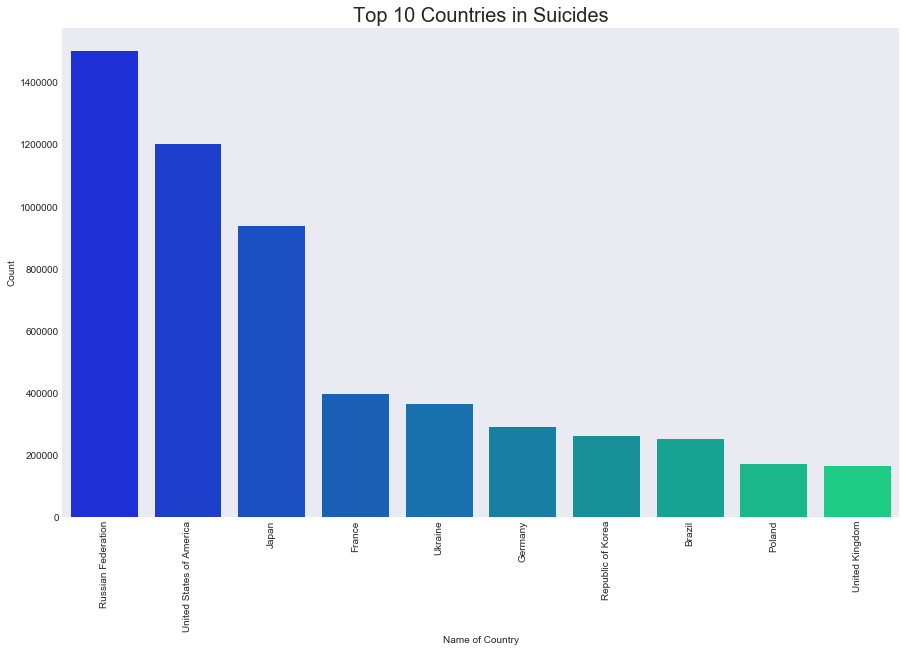

In [15]:
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.DataFrame(data.groupby(['country'])['suicides'].sum().reset_index())
x.sort_values(by = ['suicides'], ascending = False, inplace = True)

sns.barplot(x['country'].head(10), y = x['suicides'].head(10), data = x, palette = 'winter')
plt.title('Top 10 Countries in Suicides', fontsize = 20)
plt.xlabel('Name of Country')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

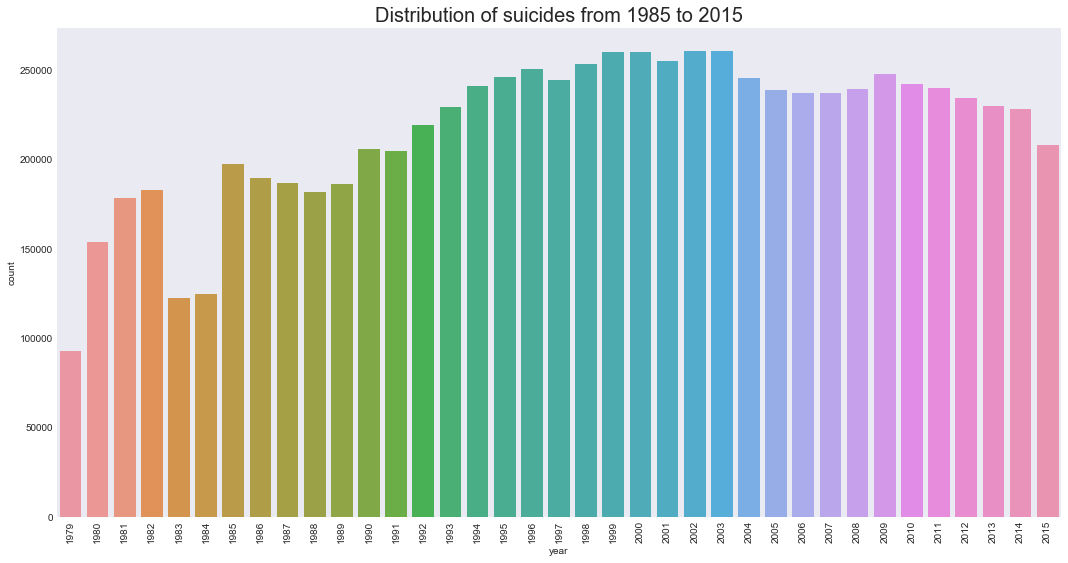

In [16]:
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (18, 9)

x = pd.DataFrame(data.groupby(['year'])['suicides'].sum().reset_index())
x.sort_values(by = ['suicides'], ascending = False, inplace = True)
x.drop(x.tail(1).index,inplace=True) #dropping 2016 as data is insufficient

sns.barplot(x['year'], y = x['suicides'], data = x)
plt.title('Distribution of suicides from 1985 to 2015', fontsize = 20)
plt.xlabel('year')
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.show()

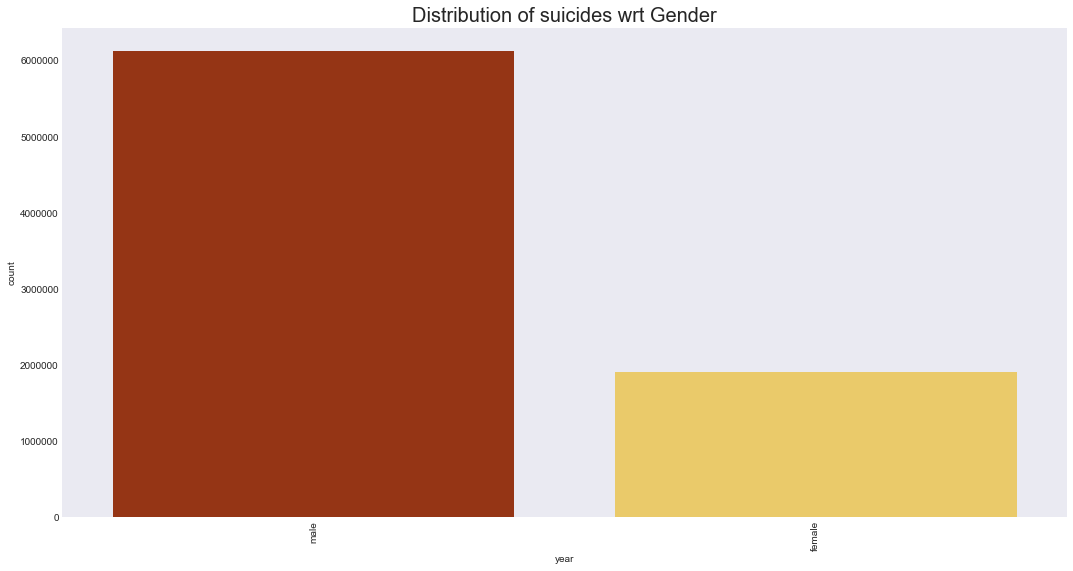

In [17]:
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (18, 9)

x = pd.DataFrame(data.groupby(['gender'])['suicides'].sum().reset_index())
x.sort_values(by = ['suicides'], ascending = False, inplace = True)

sns.barplot(x['gender'], y = x['suicides'], data = x, palette = 'afmhot')
plt.title('Distribution of suicides wrt Gender', fontsize = 20)
plt.xlabel('year')
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.show()

## Geospatial Analysis

In [18]:

suicide = pd.DataFrame(data.groupby(['country','year'])['suicides'].sum().reset_index())

count_max_sui=pd.DataFrame(suicide.groupby('country')['suicides'].sum().reset_index())

count = [ dict(
        type = 'choropleth',
        locations = count_max_sui['country'],
        locationmode='country names',
        z = count_max_sui['suicides'],
        text = count_max_sui['country'],
        colorscale = 'Cividis',
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
)]
layout = dict(
    title = '',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(
            type = 'orthographic'
        )
    )
)
fig = dict( data=count, layout=layout )
iplot(fig, validate=False, filename='d3-world-map')

### Analysis of Suicides in USA

In [19]:
data[data['country'] == 'United States of America'].sample(20)

country  year  gender          age  suicides  \
41940  United States of America  1981  female  15-24 years       960   
42072  United States of America  1992  female  15-24 years       649   
42338  United States of America  2014  female  35-54 years      4018   
42192  United States of America  2002  female  15-24 years       578   
41960  United States of America  1982    male  35-54 years      5721   
42236  United States of America  2005    male  35-54 years     10332   
42252  United States of America  2007  female  15-24 years       659   
42075  United States of America  1992  female   5-14 years        82   
41993  United States of America  1985  female    75+ years       466   
41970  United States of America  1983    male  15-24 years      3981   
42073  United States of America  1992  female  25-34 years      1070   
42280  United States of America  2009  female  55-74 years      1875   
42040  United States of America  1989  female  55-74 years      1432   
42198  United States of America  2002    male  15-24 years      3432   
42281  United States of America  2009  female    75+ years       389   
42154  United States of America  1998    male  55-74 years      4466   
42264  United States of America  2008  female  15-24 years       738   
42038  United States of America  1989  female  35-54 years      2159   
41986  United States of America  1984    male  55-74 years      5295   
42119  United States of America  1995    male    75+ years      2580   

       population  
41940    20839000  
42072    17668700  
42338    41742299  
42192    19768514  
41960    24615500  
42236    42835394  
42252    20765167  
42075    17783300  
41993     7469000  
41970    21212000  
42073    21212300  
42280    29296258  
42040    21480000  
42198    20821269  
42281    11101144  
42154    19055300  
42264    21149435  
42038    31264000  
41986    17802000  
42119     5346600

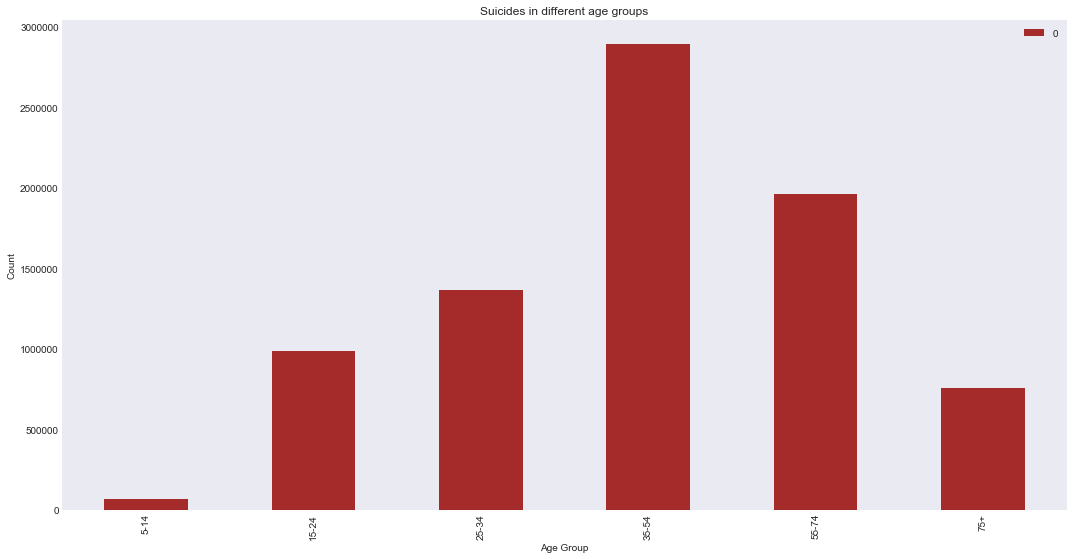

In [20]:
# replacing categorical values

data['age'] = data['age'].replace('5-14 years', 0)
data['age'] = data['age'].replace('15-24 years', 1)
data['age'] = data['age'].replace('25-34 years', 2)
data['age'] = data['age'].replace('35-54 years', 3)
data['age'] = data['age'].replace('55-74 years', 4)
data['age'] = data['age'].replace('75+ years', 5)

#data['age'].value_counts()

# suicides in different age groups

x1 = data[data['age'] == 0]['suicides'].sum()
x2 = data[data['age'] == 1]['suicides'].sum()
x3 = data[data['age'] == 2]['suicides'].sum()
x4 = data[data['age'] == 3]['suicides'].sum()
x5 = data[data['age'] == 4]['suicides'].sum()
x6 = data[data['age'] == 5]['suicides'].sum()

x = pd.DataFrame([x1, x2, x3, x4, x5, x6])
x.index = ['5-14', '15-24', '25-34', '35-54', '55-74', '75+']
x.plot(kind = 'bar', color = 'brown')

plt.title('Suicides in different age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

#### Suicide Trends according to Year

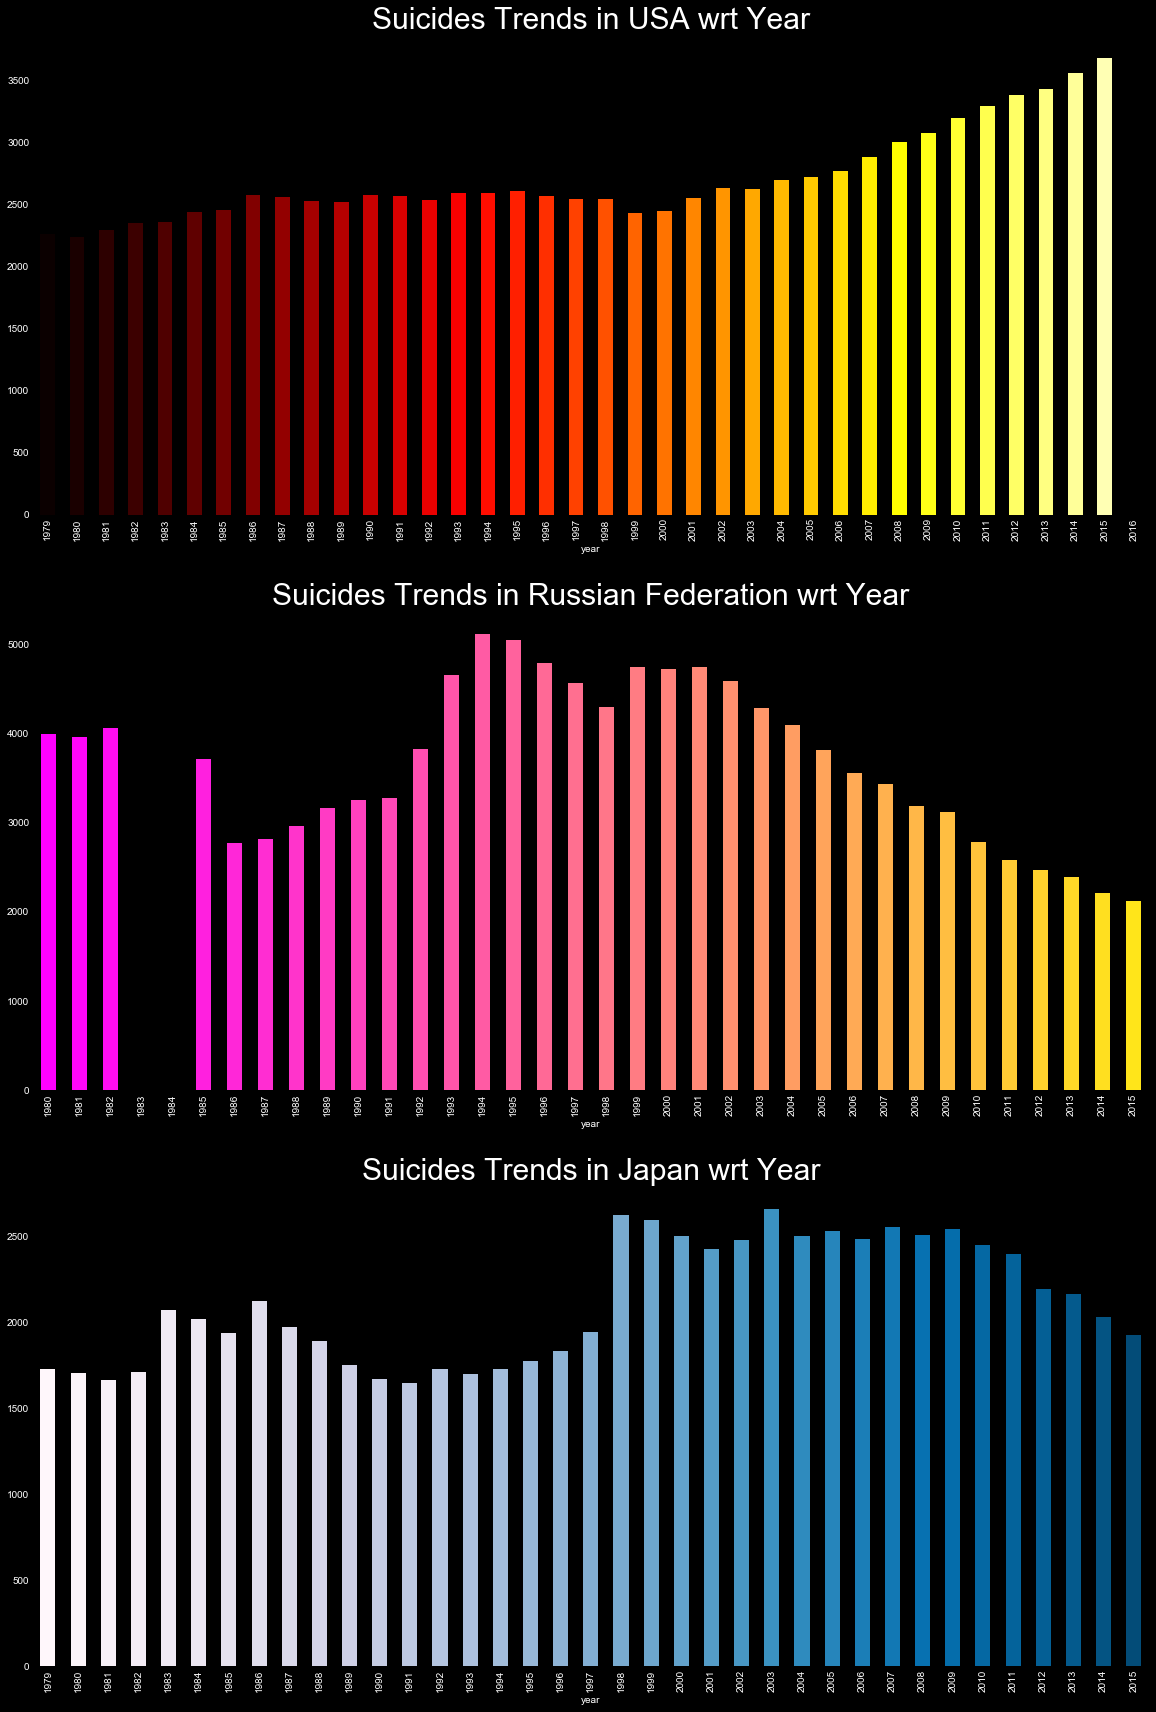

In [21]:
df = data.groupby(['country', 'year'])['suicides'].mean()
df = pd.DataFrame(df)

# looking at the suicide trends for any USA, Russia and Japan
plt.rcParams['figure.figsize'] = (20, 30)
plt.style.use('dark_background')

plt.subplot(3, 1, 1)
color = plt.cm.hot(np.linspace(0, 1, 40))
df['suicides']['United States of America'].plot.bar(color = color)
plt.title('Suicides Trends in USA wrt Year', fontsize = 30)

plt.subplot(3, 1, 2)
color = plt.cm.spring(np.linspace(0, 1, 40))
df['suicides']['Russian Federation'].plot.bar(color = color)
plt.title('Suicides Trends in Russian Federation wrt Year', fontsize = 30)

plt.subplot(3, 1, 3)
color = plt.cm.PuBu(np.linspace(0, 1, 40))
df['suicides']['Japan'].plot.bar(color = color)
plt.title('Suicides Trends in Japan wrt Year', fontsize = 30)

plt.show()

## Finding Suicide Trends according to Age Groups

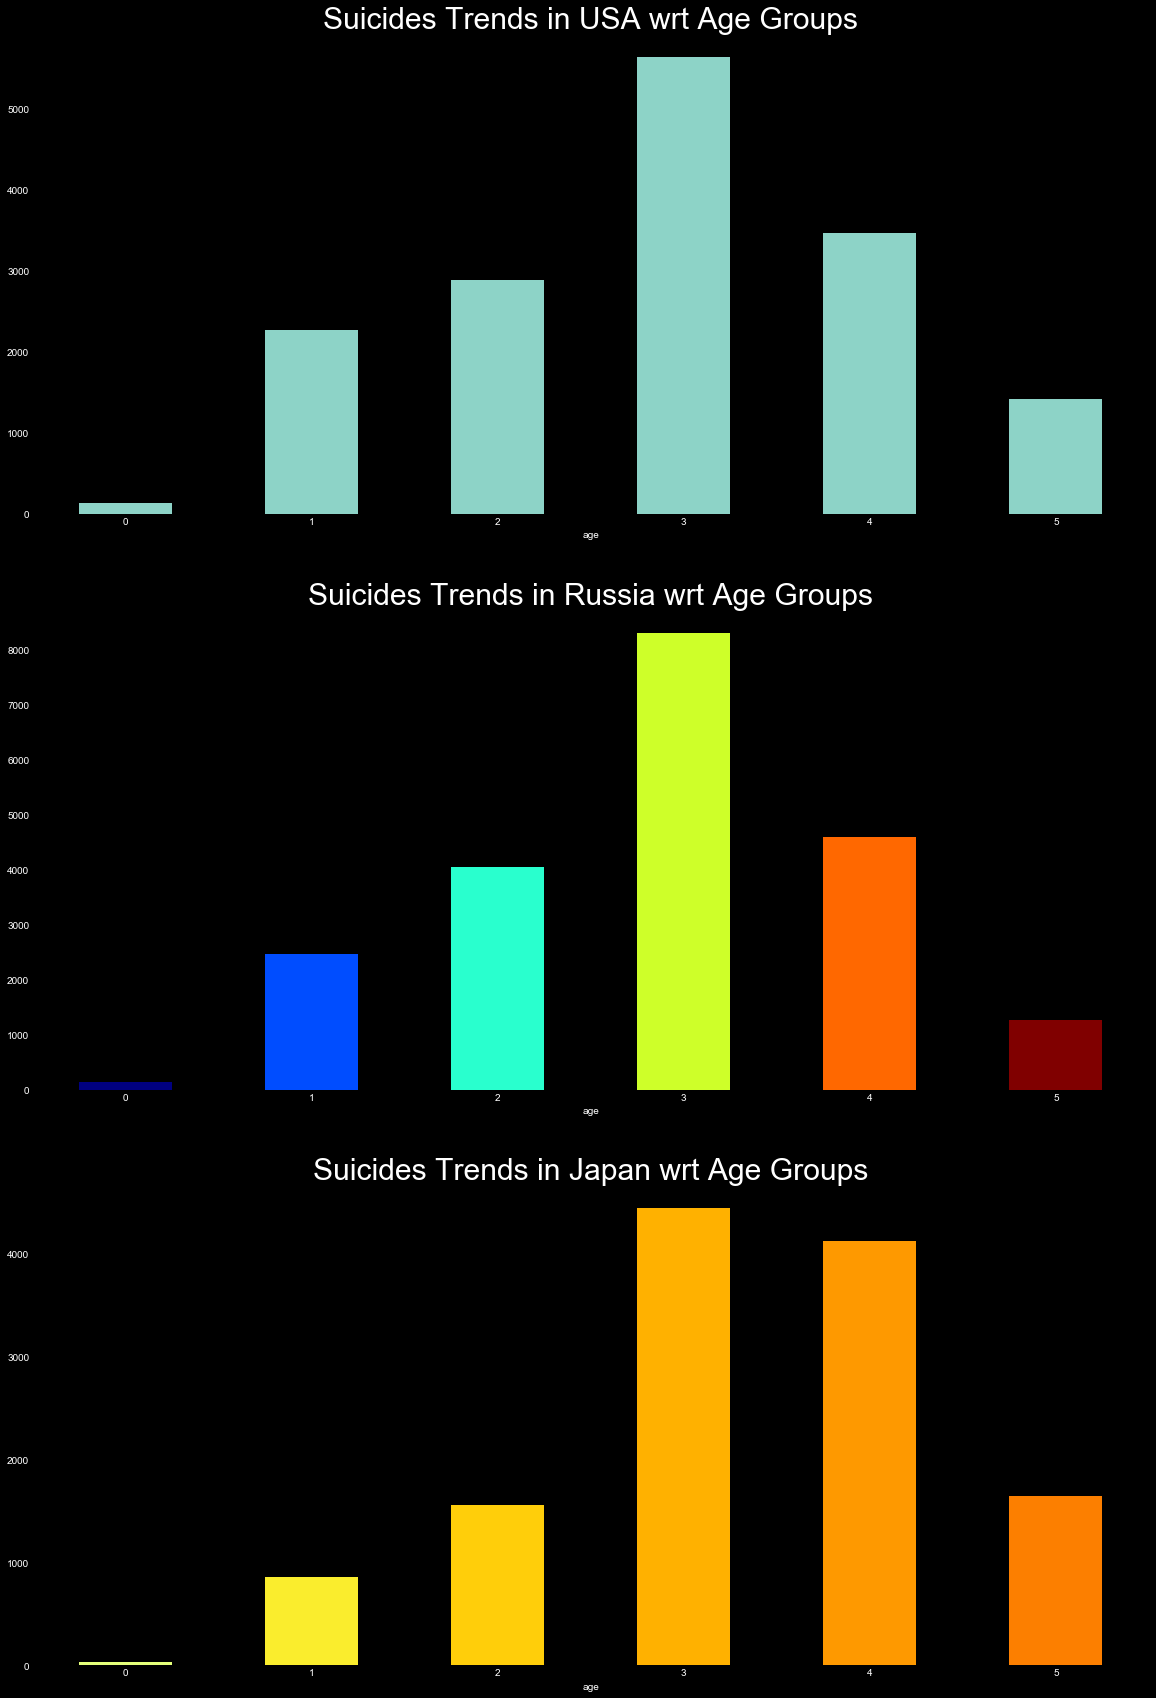

In [22]:
df2 = data.groupby(['country', 'age'])['suicides'].mean()
df2 = pd.DataFrame(df2)

plt.rcParams['figure.figsize'] = (20, 30)

plt.subplot(3, 1, 1)
df2['suicides']['United States of America'].plot.bar()
plt.title('Suicides Trends in USA wrt Age Groups', fontsize = 30)
plt.xticks(rotation = 0)

plt.subplot(3, 1, 2)
color = plt.cm.jet(np.linspace(0, 1, 6))
df2['suicides']['Russian Federation'].plot.bar(color = color)
plt.title('Suicides Trends in Russia wrt Age Groups', fontsize = 30)
plt.xticks(rotation = 0)

plt.subplot(3, 1, 3)
color = plt.cm.Wistia(np.linspace(0, 1, 6))
df2['suicides']['Japan'].plot.bar(color = color)
plt.title('Suicides Trends in Japan wrt Age Groups', fontsize = 30)
plt.xticks(rotation = 0)

plt.show()

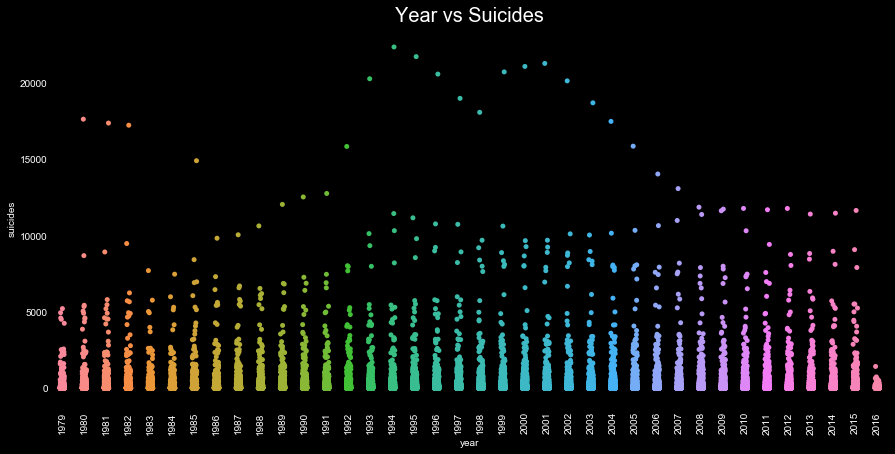

In [23]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('dark_background')

sns.stripplot(data['year'], data['suicides'])
plt.title('Year vs Suicides', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

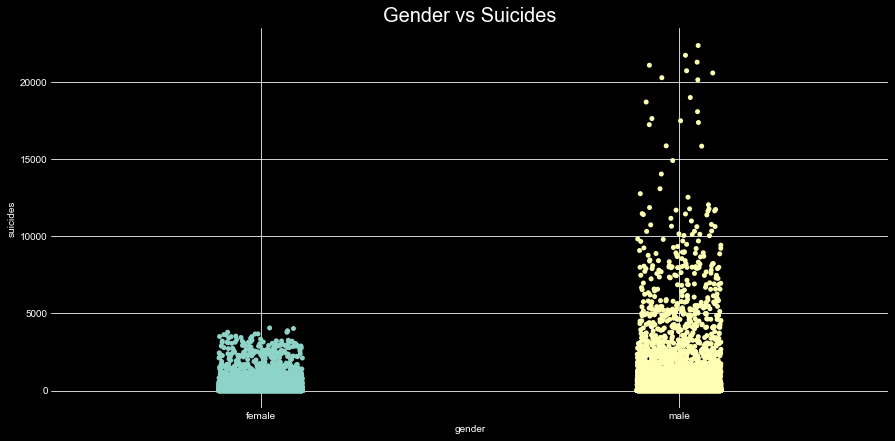

In [24]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.stripplot(data['gender'], data['suicides'])
plt.title('Gender vs Suicides', fontsize = 20)
plt.grid()
plt.show()

In [25]:
# label encoding gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['gender'].value_counts()

1    21888
0    21888
Name: gender, dtype: int64

In [26]:
data = data.drop(['country'], axis = 1)
data.columns

Index(['year', 'gender', 'age', 'suicides', 'population'], dtype='object')

In [27]:
#splitting data into dependent and independent variables

x = data.drop(['suicides'], axis = 1)
y = data['suicides']

print(x.shape)
print(y.shape)

(43776, 4)
(43776,)


In [28]:
# splitting into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32832, 4)
(32832,)
(10944, 4)
(10944,)


In [29]:
# min max scaling

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

## Models to Predict Suicides

### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)
rmse = np.sqrt(mse)
print("RMSE :", rmse)
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)


MSE : 361228.5902647013
RMSE : 601.0229531928887
r2_score : 0.3837302593217645


### Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)
rmse = np.sqrt(mse)
print("RMSE :", rmse)
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)


MSE : 84887.7554242681
RMSE : 291.3550332914606
r2_score : 0.8551782543465433


### Decision Trees

In [32]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)
rmse = np.sqrt(mse)
print("RMSE :", rmse)
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)


MSE : 152841.224525253
RMSE : 390.94913291277805
r2_score : 0.7392470464918072


### Ada Boost Regressor

In [33]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)
rmse = np.sqrt(mse)
print("RMSE :", rmse)
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)


MSE : 269173.62567798345
RMSE : 518.8194538353235
r2_score : 0.540779536934141


## Comparing the Models

**R2 Score for all four Models**

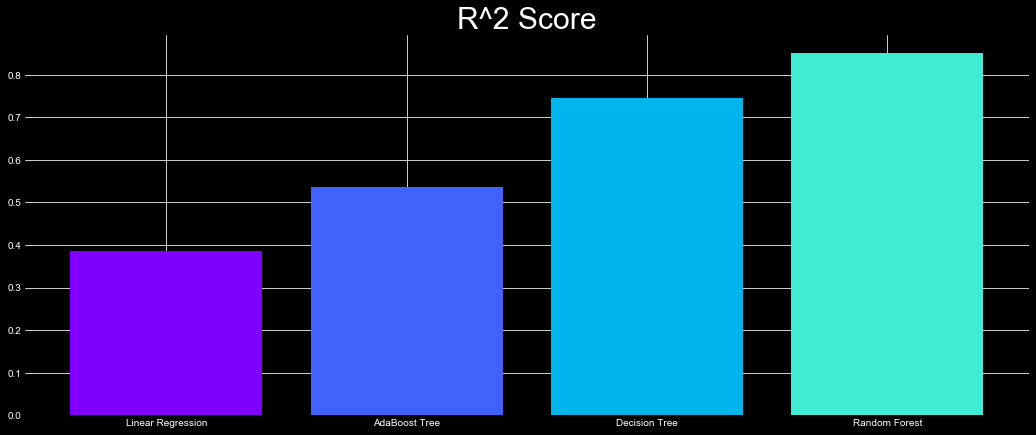

In [34]:
r2_score = np.array([0.385, 0.851, 0.745, 0.535])
labels = np.array(['Linear Regression', 'Random Forest', 'Decision Tree', 'AdaBoost Tree'])
models = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 9))
plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(models)), r2_score[models], color = color)
plt.xticks(range(len(models)), labels[models])
plt.title('R^2 Score', fontsize = 30)
plt.grid()
plt.show()

**RMSE Score for all four models**

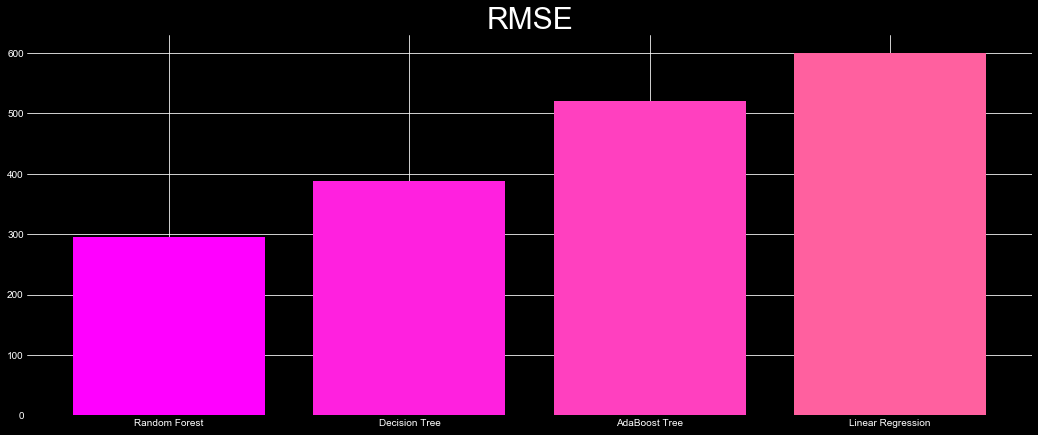

In [35]:
rmse = np.array([600, 295, 388, 521])
labels = np.array(['Linear Regression', 'Random Forest', 'Decision Tree', 'AdaBoost Tree'])
models = np.argsort(rmse)
color = plt.cm.spring(np.linspace(0, 1, 9))
plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(models)), rmse[models], color = color)
plt.xticks(range(len(models)), labels[models])
plt.title('RMSE', fontsize = 30)
plt.grid()
plt.show()

# M2 - Predictive Modelling

In [36]:
data2 = pd.read_csv('suicidedataextrafestures.csv')

print(data2.shape)

(15110, 26)


## Exploratory Data Analysis

Text(0.5, 0, 'Suicides per 100K')

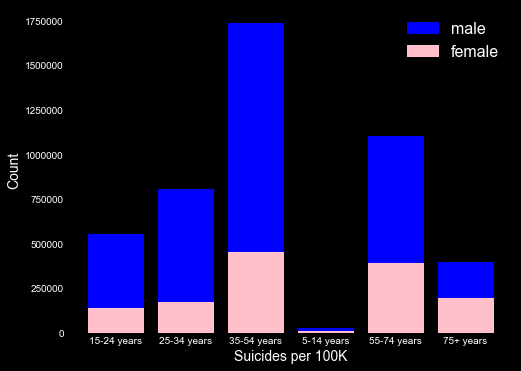

In [37]:
plt.figure(figsize=(8, 6))

agedistf = pd.DataFrame(data2.groupby('sex').get_group('female').groupby('age').suicides_no.sum())

agedistm = pd.DataFrame(data2.groupby('sex').get_group('male').groupby('age').suicides_no.sum())

plt.bar(agedistm.index, agedistm.suicides_no, color='blue')
plt.bar(agedistf.index, agedistf.suicides_no, color="pink")
plt.legend(['male', 'female'], fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Suicides per 100K', fontsize=14)

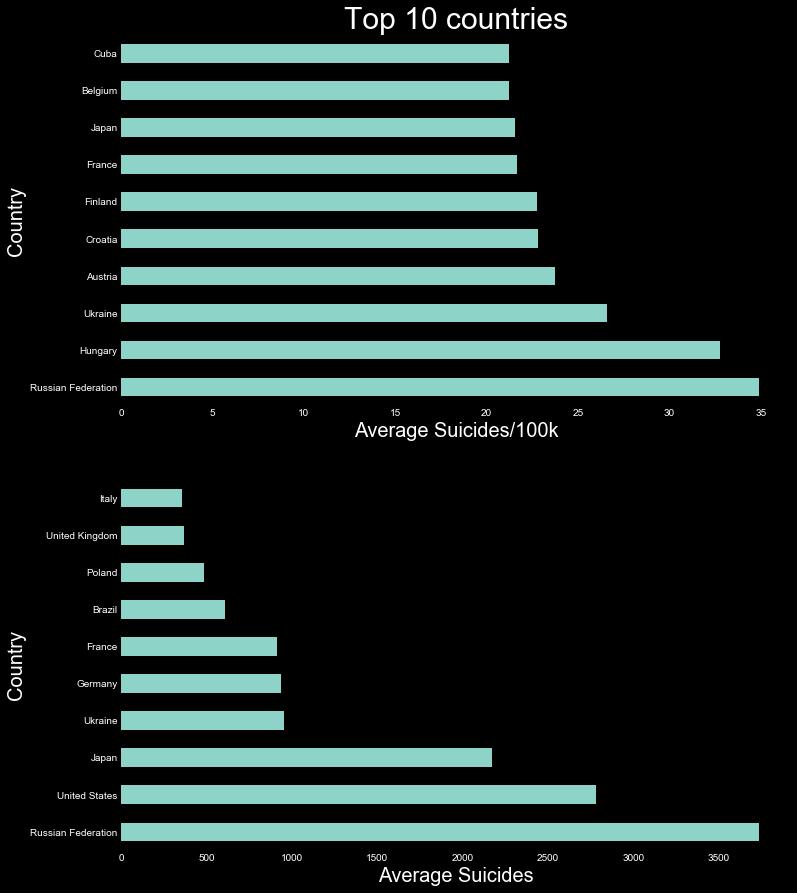

In [38]:
plt.figure(figsize=(12, 15))

plt.subplot(211)
data2.groupby(['country']).suicidesper100k.mean().nlargest(10).plot(kind='barh')
plt.xlabel('Average Suicides/100k', size=20)
plt.ylabel('Country', fontsize=20)
plt.title('Top 10 countries', fontsize=30)

plt.subplot(212)
data2.groupby(['country']).suicides_no.mean().nlargest(10).plot(kind='barh')
plt.xlabel('Average Suicides', size=20)
plt.ylabel('Country', fontsize=20);

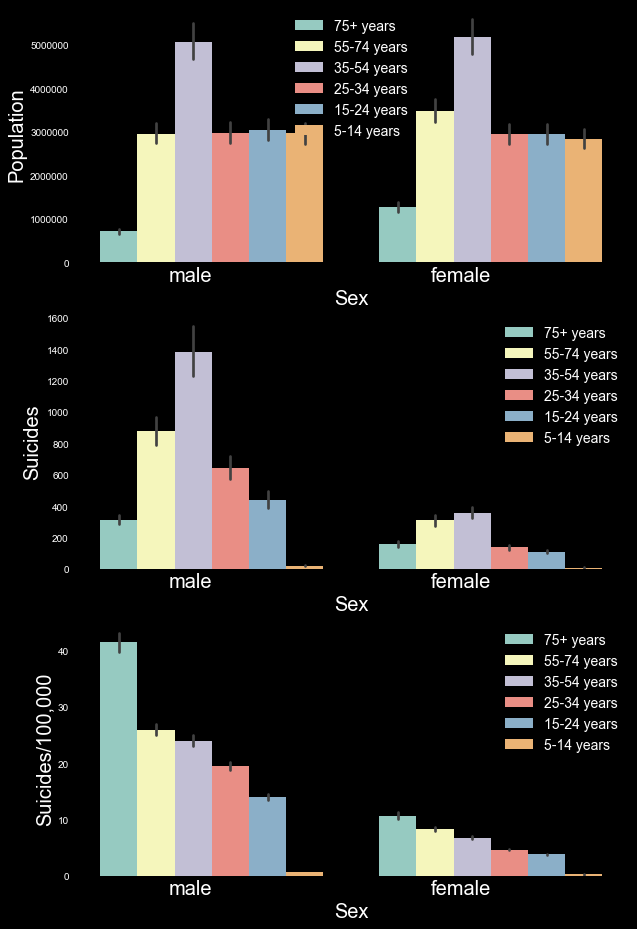

In [39]:
plt.figure(figsize=(10, 16))

plt.subplot(311)

sns.barplot(x='sex', y='population', hue='age', data=data2)
plt.xticks(ha='right', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14)

plt.subplot(313)

sns.barplot(x='sex', y='suicidesper100k', hue='age', data=data2)
plt.xticks(ha='right', fontsize=20);
plt.ylabel('Suicides/100,000',fontsize=20);
plt.xlabel('Sex',fontsize=20);
plt.legend(fontsize=14);

plt.subplot(312)
sns.barplot(x='sex', y='suicides_no', hue='age', data=data2)
plt.xticks(ha='right', fontsize=20)
plt.ylabel('Suicides', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14)

## Data Cleaning and Wrangling

In [40]:
data2.head()

country  year     sex          age  suicides_no  population  \
0  Argentina  1985    male    75+ years          202      363000   
1  Argentina  1985    male  55-74 years          485     1997000   
2  Argentina  1985    male  35-54 years          414     3346300   
3  Argentina  1985  female  55-74 years          210     2304000   
4  Argentina  1985    male  25-34 years          177     2234200   

   suicidesper100k   country-year  yearlyHDI      GDPpyear  ...  \
0            55.65  Argentina1985      0.694  8.841667e+10  ...   
1            24.29  Argentina1985      0.694  8.841667e+10  ...   
2            12.37  Argentina1985      0.694  8.841667e+10  ...   
3             9.11  Argentina1985      0.694  8.841667e+10  ...   
4             7.92  Argentina1985      0.694  8.841667e+10  ...   

   Unemployment, total (% of total labor force) (modeled ILO estimate)  \
0                                                0.0                     
1                                                0.0                     
2                                                0.0                     
3                                                0.0                     
4                                                0.0                     

  Physicians (per 1,000 people)  \
0                           0.0   
1                           0.0   
2                           0.0   
3                           0.0   
4                           0.0   

   Strength of legal rights index (0=weak to 12=strong)  Labor force, total  \
0                                                0.0                      0   
1                                                0.0                      0   
2                                                0.0                      0   
3                                                0.0                      0   
4                                                0.0                      0   

   Life expectancy at birth, total (years)  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Mobile cellular subscriptions (per 100 people)  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   Refugee population by country or territory of origin  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
0                                                0.0                                   
1                                                0.0                                   
2                                                0.0                                   
3                                                0.0                                   
4                                                0.0                                   

   Access to electricity (% of population)  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Lower secondary completion rate, total (% of relevant age group)  
0                                                0.0                 
1                                                0.0                 
2                                                0.0                 
3                        

In [41]:
data2.dtypes

country                                                                               object
year                                                                                   int64
sex                                                                                   object
age                                                                                   object
suicides_no                                                                            int64
population                                                                             int64
suicidesper100k                                                                      float64
country-year                                                                          object
yearlyHDI                                                                            float64
GDPpyear                                                                             float64
GDPpcapital                                                           

In [42]:
data2.dtypes

country                                                                               object
year                                                                                   int64
sex                                                                                   object
age                                                                                   object
suicides_no                                                                            int64
population                                                                             int64
suicidesper100k                                                                      float64
country-year                                                                          object
yearlyHDI                                                                            float64
GDPpyear                                                                             float64
GDPpcapital                                                           

In [43]:
data2.describe()

year   suicides_no    population  suicidesper100k    yearlyHDI  \
count  15110.000000  15110.000000  1.511000e+04     15110.000000  4740.000000   
mean    2000.987690    398.831105  3.035752e+06        13.403846     0.805473   
std        8.591292   1185.471686  4.908197e+06        17.656537     0.089959   
min     1985.000000      0.000000  4.400000e+03         0.000000     0.539000   
25%     1994.000000     16.000000  4.247912e+05         2.010000     0.740000   
50%     2001.000000     80.000000  1.052860e+06         7.330000     0.823000   
75%     2008.000000    275.000000  3.621750e+06        18.097500     0.884000   
max     2016.000000  22338.000000  4.380521e+07       177.610000     0.944000   

           GDPpyear    GDPpcapital      suicide%  \
count  1.511000e+04   15110.000000  15110.000000   
mean   7.837162e+11   20722.516744      0.013404   
std    1.903936e+12   19307.084627      0.017657   
min    1.201313e+09     357.000000      0.000000   
25%    5.700843e+10    4431.000000      0.002009   
50%    2.099510e+11   14729.000000      0.007333   
75%    5.621755e+11   31630.000000      0.018095   
max    1.812070e+13  109804.000000      0.177609   

       Individuals using the Internet (% of population)  Expense (% of GDP)  \
count                                      15002.000000        13634.000000   
mean                                          23.297437           19.616559   
std                                           29.502869           17.154008   
min                                            0.000000            0.000000   
25%                                            0.000000            0.000000   
50%                                            6.079458           20.244213   
75%                                           43.984351           35.162572   
max                                           96.546800           62.186783   

       ...  \
count  ...   
mean   ...   
std    ...   
min    ...   
25%    ...   
50%    ...   
75%    ...   
max    ...   

       Unemployment, total (% of total labor force) (modeled ILO estimate)  \
count                                       15110.000000                     
mean                                            5.666988                     
std                                             5.754279                     
min                                             0.000000                     
25%                                             0.000000                     
50%                                             5.100000                     
75%                                             8.855000                     
max                                            33.473000                     

       Physicians (per 1,000 people)  \
count                   12782.000000   
mean                        1.807460   
std                         1.733828   
min                         0.000000   
25%                         0.000000   
50%                         1.909000   
75%                         3.239000   
max                         7.334100   

       Strength of legal rights index (0=weak to 12=strong)  \
count                                        5618.000000      
mean                                            0.480598      
std                                             1.734895      
min                                             0.000000      
25%                                             0.000000      
50%                                             0.000000      
75%                                             0.000000      
max                                            12.000000      

       Labor force, total  Life expectancy at birth, total (years)  \
count        1.511000e+04                             15110.000000   
mean         1.252609e+07                                50.020781   
std          2.460246e+07                                36.100563   
min          0.000000e+00                                 0.00000

In [44]:
data2['suicides_no'].value_counts()

0        658
1        458
2        398
3        331
4        303
6        216
5        210
7        179
8        149
9        143
11       139
10       120
20       117
12       114
15       113
18       111
13       111
21       108
14       108
17       104
16        98
19        95
23        89
29        81
34        79
25        79
22        77
33        77
27        75
26        74
        ... 
9192       1
3053       1
5102       1
5134       1
3093       1
1052       1
1092       1
5190       1
860        1
844        1
2629       1
6975       1
2677       1
660        1
692        1
700        1
716        1
4822       1
8920       1
732        1
756        1
4862       1
4870       1
21262      1
788        1
8984       1
796        1
820        1
2877       1
2039       1
Name: suicides_no, Length: 1997, dtype: int64

In [45]:
data21 =data2[data2['suicides_no'] !=0]  #removing rows where number of suicides is 0

In [46]:
data21['suicides_no'].value_counts()

1        458
2        398
3        331
4        303
6        216
5        210
7        179
8        149
9        143
11       139
10       120
20       117
12       114
15       113
13       111
18       111
14       108
21       108
17       104
16        98
19        95
23        89
29        81
34        79
25        79
22        77
33        77
27        75
26        74
28        71
        ... 
3053       1
5102       1
5134       1
3093       1
1052       1
1092       1
5190       1
1100       1
2917       1
852        1
2677       1
844        1
660        1
692        1
700        1
716        1
4822       1
8920       1
732        1
756        1
4862       1
4870       1
21262      1
788        1
8984       1
796        1
820        1
2877       1
6975       1
2039       1
Name: suicides_no, Length: 1996, dtype: int64

In [47]:
data3=data2[(data2 != 0).all(1)]  #removing all 0 valued rows

In [48]:
data3['Life expectancy at birth, total (years)'].value_counts()

80.702439    36
77.987805    33
78.741463    24
80.490244    24
79.339024    24
76.836585    24
77.487805    24
80.904878    24
79.568293    24
79.680488    24
80.163415    24
81.451220    24
72.565854    24
78.931707    24
80.151220    24
78.446341    24
78.075610    24
80.951220    24
78.631707    23
78.329268    23
80.385366    23
79.870732    23
72.648780    23
80.180488    23
80.095122    23
81.704878    23
78.634146    23
80.343902    23
80.051220    23
75.063415    23
             ..
74.071000     9
71.460000     9
66.207000     9
82.060976     9
71.409000     9
82.358537     9
79.602439     9
82.917073     9
80.502439     9
72.348000     9
67.375000     9
76.145000     8
65.899000     8
80.690244     8
70.944000     8
75.767000     8
65.256000     8
77.984390     8
66.491000     8
81.609756     8
75.957000     7
81.158537     7
80.963415     7
79.653659     7
81.502439     6
74.142000     4
74.139000     4
74.038000     3
74.140000     1
74.146000     1
Name: Life expectancy at

In [49]:
data4=data3.sort_values(by='Life expectancy at birth, total (years)',ascending=True)

In [50]:
data4.head()

country  year     sex          age  suicides_no  population  \
11803  South Africa  2004    male  25-34 years           90     4016137   
11804  South Africa  2004    male  35-54 years           88     4851225   
11802  South Africa  2004    male    75+ years            6      216088   
11806  South Africa  2004    male  15-24 years           71     5034637   
11807  South Africa  2004  female  15-24 years           29     4974786   

       suicidesper100k      country-year  yearlyHDI      GDPpyear  ...  \
11803             2.24  South Africa2004        NaN  2.289370e+11  ...   
11804             1.81  South Africa2004        NaN  2.289370e+11  ...   
11802             2.78  South Africa2004        NaN  2.289370e+11  ...   
11806             1.41  South Africa2004        NaN  2.289370e+11  ...   
11807             0.58  South Africa2004        NaN  2.289370e+11  ...   

       Unemployment, total (% of total labor force) (modeled ILO estimate)  \
11803                                             29.576                     
11804                                             29.576                     
11802                                             29.576                     
11806                                             29.576                     
11807                                             29.576                     

      Physicians (per 1,000 people)  \
11803                        0.7219   
11804                        0.7219   
11802                        0.7219   
11806                        0.7219   
11807                        0.7219   

       Strength of legal rights index (0=weak to 12=strong)  \
11803                                                NaN      
11804                                                NaN      
11802                                                NaN      
11806                                                NaN      
11807                                                NaN      

       Labor force, total  Life expectancy at birth, total (years)  \
11803            17128032                                   53.444   
11804            17128032                                   53.444   
11802            17128032                                   53.444   
11806            17128032                                   53.444   
11807            17128032                                   53.444   

       Mobile cellular subscriptions (per 100 people)  \
11803                                       44.064899   
11804                                       44.064899   
11802                                       44.064899   
11806                                       44.064899   
11807                                       44.064899   

       Refugee population by country or territory of origin  \
11803                                              272.0      
11804                                              272.0      
11802                                              272.0      
11806                                              272.0      
11807                                              272.0      

       Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
11803                                              0.746                                   
11804                                              0.746                                   
11802                                              0.746                                   
11806                                              0.746                                   
11807                                              0.746                                   

       Access to electricity (% of population)  \
11803                                     80.9   
11804                                     80.9   
11802                                     80.9   
11806                                     80.9   
11807                                     80.9   

       Lower secondary completion ra

In [51]:
data4.tail()

country  year     sex          age  suicides_no  population  \
8932   Japan  2013    male  15-24 years         1242     6143000   
8931   Japan  2013    male  25-34 years         2178     7186000   
8930   Japan  2013    male  55-74 years         5908    16202000   
8939   Japan  2013  female   5-14 years           34     5398000   
8928   Japan  2013    male    75+ years         2362     5964000   

      suicidesper100k country-year  yearlyHDI      GDPpyear  ...  \
8932            20.22    Japan2013       0.89  5.155720e+12  ...   
8931            30.31    Japan2013       0.89  5.155720e+12  ...   
8930            36.46    Japan2013       0.89  5.155720e+12  ...   
8939             0.63    Japan2013       0.89  5.155720e+12  ...   
8928            39.60    Japan2013       0.89  5.155720e+12  ...   

      Unemployment, total (% of total labor force) (modeled ILO estimate)  \
8932                                                4.0                     
8931                                                4.0                     
8930                                                4.0                     
8939                                                4.0                     
8928                                                4.0                     

     Physicians (per 1,000 people)  \
8932                           NaN   
8931                           NaN   
8930                           NaN   
8939                           NaN   
8928                           NaN   

      Strength of legal rights index (0=weak to 12=strong)  \
8932                                                5.0      
8931                                                5.0      
8930                                                5.0      
8939                                                5.0      
8928                                                5.0      

      Labor force, total  Life expectancy at birth, total (years)  \
8932            65970039                                83.331951   
8931            65970039                                83.331951   
8930            65970039                                83.331951   
8939            65970039                                83.331951   
8928            65970039                                83.331951   

      Mobile cellular subscriptions (per 100 people)  \
8932                                      115.254273   
8931                                      115.254273   
8930                                      115.254273   
8939                                      115.254273   
8928                                      115.254273   

      Refugee population by country or territory of origin  \
8932                                              157.0      
8931                                              157.0      
8930                                              157.0      
8939                                              157.0      
8928                                              157.0      

      Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
8932                                              2.759                                   
8931                                              2.759                                   
8930                                              2.759                                   
8939                                              2.759                                   
8928                                              2.759                                   

      Access to electricity (% of population)  \
8932                                    100.0   
8931                                    100.0   
8930                                    100.0   
8939                                    100.0   
8928                                    100.0   

      Lower secondary completion rate, total (% of relevant age group)  
8932                                                NaN                 
8931     

In [52]:
data4['age'].value_counts()

35-54 years    1643
55-74 years    1636
25-34 years    1632
15-24 years    1623
75+ years      1592
5-14 years     1381
Name: age, dtype: int64

In [53]:
pd.set_option('display.max_columns', None)  #changing max colums option in order to see all columns of Dataframe
data4.tail()

country  year     sex          age  suicides_no  population  \
8932   Japan  2013    male  15-24 years         1242     6143000   
8931   Japan  2013    male  25-34 years         2178     7186000   
8930   Japan  2013    male  55-74 years         5908    16202000   
8939   Japan  2013  female   5-14 years           34     5398000   
8928   Japan  2013    male    75+ years         2362     5964000   

      suicidesper100k country-year  yearlyHDI      GDPpyear  GDPpcapital  \
8932            20.22    Japan2013       0.89  5.155720e+12        42781   
8931            30.31    Japan2013       0.89  5.155720e+12        42781   
8930            36.46    Japan2013       0.89  5.155720e+12        42781   
8939             0.63    Japan2013       0.89  5.155720e+12        42781   
8928            39.60    Japan2013       0.89  5.155720e+12        42781   

        generation  suicide%  \
8932    Millenials  0.020218   
8931    Millenials  0.030309   
8930       Boomers  0.036465   
8939  Generation Z  0.000630   
8928        Silent  0.039604   

      Individuals using the Internet (% of population)  Expense (% of GDP)  \
8932                                         88.219429           18.342443   
8931                                         88.219429           18.342443   
8930                                         88.219429           18.342443   
8939                                         88.219429           18.342443   
8928                                         88.219429           18.342443   

      Compensation of employees (% of expense)  \
8932                                  5.558282   
8931                                  5.558282   
8930                                  5.558282   
8939                                  5.558282   
8928                                  5.558282   

      Unemployment, total (% of total labor force) (modeled ILO estimate)  \
8932                                                4.0                     
8931                                                4.0                     
8930                                                4.0                     
8939                                                4.0                     
8928                                                4.0                     

      Physicians (per 1,000 people)  \
8932                            NaN   
8931                            NaN   
8930                            NaN   
8939                            NaN   
8928                            NaN   

      Strength of legal rights index (0=weak to 12=strong)  \
8932                                                5.0      
8931                                                5.0      
8930                                                5.0      
8939                                                5.0      
8928                                                5.0      

      Labor force, total  Life expectancy at birth, total (years)  \
8932            65970039                                83.331951   
8931            65970039                                83.331951   
8930            65970039                                83.331951   
8939            65970039                                83.331951   
8928            65970039                                83.331951   

      Mobile cellular subscriptions (per 100 people)  \
8932                                      115.254273   
8931                                      115.254273   
8930                                      115.254273   
8939                                      115.254273   
8928                                      115.254273   

      Refugee population by country or territory of origin  \
8932                                              157.0      
8931                                              157.0      
8930                                              157.0      
8939                                              157.0      
8928                                       

In [54]:
data4.corr()  #This correlation is not proper as data is not cleaned(8 entries per year as dataset is grouped by country, age group and year)

year  suicides_no  \
year                                                1.000000    -0.015089   
suicides_no                                        -0.015089     1.000000   
population                                          0.028874     0.594756   
suicidesper100k                                    -0.090289     0.400339   
yearlyHDI                                           0.264882     0.102879   
GDPpyear                                            0.110279     0.388159   
GDPpcapital                                         0.311320     0.014828   
suicide%                                           -0.090290     0.400340   
Individuals using the Internet (% of population)    0.698114    -0.002946   
Expense (% of GDP)                                  0.069634    -0.185358   
Compensation of employees (% of expense)           -0.000790    -0.114023   
Unemployment, total (% of total labor force) (m... -0.055285    -0.060470   
Physicians (per 1,000 people)                       0.110659    -0.018826   
Strength of legal rights index (0=weak to 12=st...       NaN     0.093323   
Labor force, total                                  0.038370     0.494759   
Life expectancy at birth, total (years)             0.240980    -0.056435   
Mobile cellular subscriptions (per 100 people)      0.830238    -0.029168   
Refugee population by country or territory of o... -0.032371     0.063124   
Contributing family workers, total (% of total ... -0.116685    -0.084675   
Access to electricity (% of population)             0.073916     0.063696   
Lower secondary completion rate, total (% of re...  0.292189    -0.103892   

                                                    population  \
year                                                  0.028874   
suicides_no                                           0.594756   
population                                            1.000000   
suicidesper100k                                      -0.011614   
yearlyHDI                                            -0.011413   
GDPpyear                                              0.704537   
GDPpcapital                                           0.010642   
suicide%                                             -0.011613   
Individuals using the Internet (% of population)      0.003422   
Expense (% of GDP)                                   -0.309265   
Compensation of employees (% of expense)             -0.114195   
Unemployment, total (% of total labor force) (m...   -0.062859   
Physicians (per 1,000 people)                        -0.228092   
Strength of legal rights index (0=weak to 12=st...    0.037985   
Labor force, total                                    0.865674   
Life expectancy at birth, total (years)              -0.069529   
Mobile cellular subscriptions (per 100 people)       -0.025484   
Refugee population by country or territory of o...    0.001202   
Contributing family workers, total (% of total ...   -0.052763   
Access to electricity (% of population)              -0.042879   
Lower secondary completion rate, total (% of re...   -0.298455   

                                                    suicidesper100k  \
year                                                      -0.090289   
suicides_no                                                0.400339   
population                                                -0.011614   
suicidesper100k                                            1.000000   
yearlyHDI                                                  0.110445   
GDPpyear                                                   0.001739   
GDPpcapital                                                0.024412   
suicide%                                                   1.000000   
Individuals using the Internet (% of population)          -0.004557   
Expense (% of GDP)                                         0.090744   
Compensation of employees (% of expense)                  -0.118218   
Unemployment, total (% of total labor force) (m...      

In [55]:
data4.describe()

year   suicides_no    population  suicidesper100k    yearlyHDI  \
count  9507.000000   9507.000000  9.507000e+03      9507.000000  3374.000000   
mean   2004.060166    425.006101  3.179841e+06        13.687046     0.816069   
std       5.481465   1263.960587  5.071843e+06        17.352202     0.086262   
min    1995.000000      1.000000  5.400000e+03         0.020000     0.594000   
25%    1999.000000     20.000000  4.804090e+05         2.400000     0.748000   
50%    2004.000000     87.000000  1.146473e+06         7.690000     0.833000   
75%    2009.000000    290.500000  3.785620e+06        18.355000     0.888000   
max    2013.000000  21706.000000  4.380521e+07       165.960000     0.942000   

           GDPpyear    GDPpcapital     suicide%  \
count  9.507000e+03    9507.000000  9507.000000   
mean   8.991835e+11   23259.332913     0.013687   
std    2.073532e+12   20345.638735     0.017352   
min    1.596969e+09     428.000000     0.000019   
25%    8.614202e+10    5470.000000     0.002404   
50%    2.514990e+11   19041.000000     0.007686   
75%    6.785340e+11   37528.000000     0.018356   
max    1.669150e+13  109804.000000     0.165961   

       Individuals using the Internet (% of population)  Expense (% of GDP)  \
count                                       9424.000000         8143.000000   
mean                                          35.424060           31.409591   
std                                           29.815104           10.036526   
min                                            0.000092           10.806881   
25%                                            6.710322           21.894501   
50%                                           29.431692           32.437868   
75%                                           62.400000           39.329416   
max                                           96.546800           62.186783   

       Compensation of employees (% of expense)  \
count                               8052.000000   
mean                                  15.332978   
std                                    7.460515   
min                                    2.891704   
25%                                   10.230191   
50%                                   13.986360   
75%                                   19.667876   
max                                   48.962685   

       Unemployment, total (% of total labor force) (modeled ILO estimate)  \
count                                        9507.000000                     
mean                                            8.577461                     
std                                             5.019577                     
min                                             0.489000                     
25%                                             5.224000                     
50%                                             7.676000                     
75%                                            10.423000                     
max                                            33.473000                     

       Physicians (per 1,000 people)  \
count                    7279.000000   
mean                        3.011294   
std                         1.173862   
min                         0.238400   
25%                         2.200000   
50%                         3.042700   
75%                         3.700000   
max                         7.334100   

       Strength of legal rights index (0=weak to 12=strong)  \
count                                         478.000000      
mean                                            5.500000      
std                                             2.632446      
min                                             1.000000      
25%                                             4.000000      
50%                                             5.000000      
75%                                             7.000000      
max                                            12.000000      

       Labor force, total  Li

In [56]:
#data5=data4['country'].groupby(data4['year'])

In [57]:
#data5.head()

In [58]:
data3.drop(['generation'], axis = 1) #removing generation column as it depends on age group

country  year     sex          age  suicides_no  population  \
120     Argentina  1995    male    75+ years          190      433800   
121     Argentina  1995    male  55-74 years          515     2214000   
122     Argentina  1995    male  35-54 years          485     3787800   
123     Argentina  1995    male  25-34 years          218     2404900   
124     Argentina  1995    male  15-24 years          277     3112100   
125     Argentina  1995  female    75+ years           49      742200   
126     Argentina  1995  female  55-74 years          134     2625900   
127     Argentina  1995  female  35-54 years          139     3950100   
128     Argentina  1995  female  15-24 years          101     3053300   
129     Argentina  1995  female  25-34 years           62     2396900   
130     Argentina  1995  female   5-14 years           19     3261100   
131     Argentina  1995    male   5-14 years           15     3363300   
132     Argentina  1996    male    75+ years          189      445800   
133     Argentina  1996    male  55-74 years          464     2235900   
134     Argentina  1996    male  35-54 years          524     3847300   
135     Argentina  1996    male  25-34 years          226     2442900   
136     Argentina  1996    male  15-24 years          280     3185600   
137     Argentina  1996  female    75+ years           59      766100   
138     Argentina  1996  female  55-74 years          131     2653800   
139     Argentina  1996  female  35-54 years          176     4014100   
140     Argentina  1996  female  15-24 years          105     3123600   
141     Argentina  1996  female  25-34 years           52     2428400   
142     Argentina  1996    male   5-14 years           14     3370400   
143     Argentina  1996  female   5-14 years            9     3266800   
144     Argentina  1997    male    75+ years          195      490152   
145     Argentina  1997    male  55-74 years          457     2252148   
146     Argentina  1997    male  35-54 years          501     3934581   
147     Argentina  1997    male  25-34 years          213     2460112   
148     Argentina  1997    male  15-24 years          260     3198193   
149     Argentina  1997  female    75+ years           47      854095   
...           ...   ...     ...          ...          ...         ...   
15068  Uzbekistan  2011    male    75+ years           10      204956   
15069  Uzbekistan  2011  female  35-54 years           78     3404363   
15070  Uzbekistan  2011    male   5-14 years           45     2710780   
15071  Uzbekistan  2011  female  55-74 years           19     1218296   
15072  Uzbekistan  2011  female    75+ years            5      330662   
15073  Uzbekistan  2011  female   5-14 years           28     2588474   
15074  Uzbekistan  2012    male  35-54 years          404     3273281   
15075  Uzbekistan  2012    male  55-74 years          133     1141487   
15076  Uzbekistan  2012    male  25-34 years          290     2548472   
15077  Uzbekistan  2012  female  15-24 years          333     3072826   
15078  Uzbekistan  2012    male  15-24 years          311     3199204   
15079  Uzbekistan  2012    male    75+ years           15      213713   
15080  Uzbekistan  2012  female  25-34 years          148     2556673   
15081  Uzbekistan  2012  female  35-54 years           89     3474788   
15082  Uzbekistan  2012    male   5-14 years           67     2701361   
15083  Uzbekistan  2012  female  55-74 years           25     1283060   
15084  Uzbekistan  2012  female    75+ years            4      338557   
15085  Uzbekistan  2012  female   5-14 years           16     2578408   
15086  Uzbekistan  2013    male  35-54 years          481     3346411   
15087  Uzbekistan  2013    male  25-34 years          328     2644648   
15088  Uzbekistan  2013  female  15-24 years          323     3039740   
15089  Uzbekistan  2013    male  15-24 years          320     3171202   
15090  Uzbekistan  2013    male  55-74 years          119     120279

In [59]:
data_nonan=pd.DataFrame(data3)

In [60]:
data_nonan.dropna(subset=["Strength of legal rights index (0=weak to 12=strong)"], axis=0, inplace=True)  
#removing rows with null values in this column

In [61]:
data_nonan.head()
# we realise that legal rights index is only calculated for 2013, hence we discard this column later

country  year   sex          age  suicides_no  population  \
336  Argentina  2013  male    75+ years          168      699046   
337  Argentina  2013  male  15-24 years          696     3486661   
338  Argentina  2013  male  25-34 years          499     3271373   
339  Argentina  2013  male  55-74 years          398     2894129   
340  Argentina  2013  male  35-54 years          604     4950850   

     suicidesper100k   country-year  yearlyHDI      GDPpyear  GDPpcapital  \
336            24.03  Argentina2013      0.833  5.520250e+11        14206   
337            19.96  Argentina2013      0.833  5.520250e+11        14206   
338            15.25  Argentina2013      0.833  5.520250e+11        14206   
339            13.75  Argentina2013      0.833  5.520250e+11        14206   
340            12.20  Argentina2013      0.833  5.520250e+11        14206   

       generation  suicide%  Individuals using the Internet (% of population)  \
336        Silent  0.024033                                              59.9   
337    Millenials  0.019962                                              59.9   
338    Millenials  0.015254                                              59.9   
339       Boomers  0.013752                                              59.9   
340  Generation X  0.012200                                              59.9   

     Expense (% of GDP)  Compensation of employees (% of expense)  \
336                 NaN                                       NaN   
337                 NaN                                       NaN   
338                 NaN                                       NaN   
339                 NaN                                       NaN   
340                 NaN                                       NaN   

     Unemployment, total (% of total labor force) (modeled ILO estimate)  \
336                                                7.1                     
337                                                7.1                     
338                                                7.1                     
339                                                7.1                     
340                                                7.1                     

     Physicians (per 1,000 people)  \
336                         3.9066   
337                         3.9066   
338                         3.9066   
339                         3.9066   
340                         3.9066   

     Strength of legal rights index (0=weak to 12=strong)  Labor force, total  \
336                                                3.0               18988880   
337                                                3.0               18988880   
338                                                3.0               18988880   
339                                                3.0               18988880   
340                                                3.0               18988880   

     Life expectancy at birth, total (years)  \
336                                   75.756   
337                                   75.756   
338                                   75.756   
339                                   75.756   
340                                   75.756   

     Mobile cellular subscriptions (per 100 people)  \
336                                      159.639461   
337                                      159.639461   
338                                      159.639461   
339                                      159.639461   
340                                      159.639461   

     Refugee population by country or territory of origin  \
336                                              388.0      
337                                              388.0      
338                                              388.0      
339                                              388.0      
340                                              388.0      

     Contributing family workers, total (% of total employment) (modeled 

In [62]:
data_nonan.drop(['generation'], axis = 1)

country  year     sex          age  suicides_no  population  \
336         Argentina  2013    male    75+ years          168      699046   
337         Argentina  2013    male  15-24 years          696     3486661   
338         Argentina  2013    male  25-34 years          499     3271373   
339         Argentina  2013    male  55-74 years          398     2894129   
340         Argentina  2013    male  35-54 years          604     4950850   
341         Argentina  2013  female  15-24 years          167     3384642   
342         Argentina  2013  female  25-34 years          102     3226464   
343         Argentina  2013  female  35-54 years          157     5099167   
344         Argentina  2013  female  55-74 years          102     3390673   
345         Argentina  2013  female    75+ years           29     1303352   
346         Argentina  2013  female   5-14 years           32     3515742   
347         Argentina  2013    male   5-14 years           33     3637026   
624           Armenia  2013    male    75+ years            7       58640   
625           Armenia  2013  female    75+ years            6       95093   
626           Armenia  2013    male  55-74 years           11      218063   
627           Armenia  2013  female  55-74 years           11      280566   
628           Armenia  2013    male  25-34 years            9      250487   
629           Armenia  2013    male  35-54 years           13      370440   
630           Armenia  2013  female  35-54 years            6      423841   
631           Armenia  2013    male  15-24 years            2      243687   
632           Armenia  2013    male   5-14 years            1      193754   
633           Armenia  2013  female  15-24 years            1      242386   
994         Australia  2013    male    75+ years          160      627275   
995         Australia  2013    male  35-54 years          754     3118829   
996         Australia  2013    male  25-34 years          329     1702401   
997         Australia  2013    male  55-74 years          418     2221866   
998         Australia  2013    male  15-24 years          267     1591539   
999         Australia  2013  female  35-54 years          275     3171477   
1000        Australia  2013  female  55-74 years          145     2276104   
1001        Australia  2013  female  15-24 years           95     1512779   
...               ...   ...     ...          ...          ...         ...   
14444  United Kingdom  2013  female    75+ years          103     3004685   
14445  United Kingdom  2013  female  55-74 years          232     6839180   
14446  United Kingdom  2013  female  25-34 years          124     4356539   
14447  United Kingdom  2013  female  15-24 years           81     4017291   
14448  United Kingdom  2013    male   5-14 years            5     3734237   
14449  United Kingdom  2013  female   5-14 years            4     3559249   
14810   United States  2013    male    75+ years         2990     7816638   
14811   United States  2013    male  55-74 years         8445    30405404   
14812   United States  2013    male  35-54 years        11396    42085688   
14813   United States  2013    male  25-34 years         5063    21386891   
14814   United States  2013    male  15-24 years         3903    22735631   
14815   United States  2013  female  35-54 years         3776    41983845   
14816   United States  2013  female  55-74 years         2484    33229667   
14817   United States  2013  female  25-34 years         1285    20951958   
14818   United States  2013  female  15-24 years          975    21698877   
14819   United States  2013  female    75+ years          431    11486590   
14820   United States  2013    male   5-14 years          252    21233001   
14821   United States  2013  female   5-14 years          143    20308672   
15086      Uzbekistan  2013    male  35-54 years          481     3346411   
15087      Uzbekistan  2013    male  25-34 years          328     2644648   
15088     

In [63]:
data_nonan['country'].describe(include=object)

count             478
unique             41
top       Netherlands
freq               12
Name: country, dtype: object

In [64]:
data_nonan['country'].value_counts()

Netherlands           12
Austria               12
Mexico                12
United States         12
Russian Federation    12
Australia             12
Colombia              12
Chile                 12
Spain                 12
Japan                 12
Germany               12
Thailand              12
Romania               12
Poland                12
United Kingdom        12
Bulgaria              12
South Africa          12
Denmark               12
Czech Republic        12
Turkey                12
France                12
Sweden                12
Canada                12
Brazil                12
Italy                 12
Finland               12
Belgium               12
Georgia               12
Switzerland           12
Argentina             12
Uzbekistan            12
Croatia               11
New Zealand           11
Israel                11
Norway                11
Greece                11
Ireland               11
Hungary               11
Portugal              10
Armenia               10


In [65]:
data_greece=data_nonan[data_nonan['country']=='Greece']

In [66]:
data_greece

country  year     sex          age  suicides_no  population  \
6556  Greece  2013    male  55-74 years          141     1144571   
6557  Greece  2013    male    75+ years           52      475655   
6558  Greece  2013    male  35-54 years          152     1572683   
6559  Greece  2013    male  25-34 years           55      737922   
6560  Greece  2013    male  15-24 years           25      585990   
6561  Greece  2013  female  55-74 years           34     1270384   
6562  Greece  2013  female  25-34 years           19      716209   
6563  Greece  2013  female  35-54 years           37     1630105   
6564  Greece  2013  female    75+ years           13      659686   
6565  Greece  2013  female  15-24 years            4      564219   
6566  Greece  2013  female   5-14 years            1      524573   

      suicidesper100k country-year  yearlyHDI      GDPpyear  GDPpcapital  \
6556            12.32   Greece2013      0.863  2.398620e+11        22994   
6557            10.93   Greece2013      0.863  2.398620e+11        22994   
6558             9.67   Greece2013      0.863  2.398620e+11        22994   
6559             7.45   Greece2013      0.863  2.398620e+11        22994   
6560             4.27   Greece2013      0.863  2.398620e+11        22994   
6561             2.68   Greece2013      0.863  2.398620e+11        22994   
6562             2.65   Greece2013      0.863  2.398620e+11        22994   
6563             2.27   Greece2013      0.863  2.398620e+11        22994   
6564             1.97   Greece2013      0.863  2.398620e+11        22994   
6565             0.71   Greece2013      0.863  2.398620e+11        22994   
6566             0.19   Greece2013      0.863  2.398620e+11        22994   

        generation  suicide%  \
6556       Boomers  0.012319   
6557        Silent  0.010932   
6558  Generation X  0.009665   
6559    Millenials  0.007453   
6560    Millenials  0.004266   
6561       Boomers  0.002676   
6562    Millenials  0.002653   
6563  Generation X  0.002270   
6564        Silent  0.001971   
6565    Millenials  0.000709   
6566  Generation Z  0.000191   

      Individuals using the Internet (% of population)  Expense (% of GDP)  \
6556                                           59.8663           60.396577   
6557                                           59.8663           60.396577   
6558                                           59.8663           60.396577   
6559                                           59.8663           60.396577   
6560                                           59.8663           60.396577   
6561                                           59.8663           60.396577   
6562                                           59.8663           60.396577   
6563                                           59.8663           60.396577   
6564                                           59.8663           60.396577   
6565                                           59.8663           60.396577   
6566                                           59.8663           60.396577   

      Compensation of employees (% of expense)  \
6556                                 18.102998   
6557                                 18.102998   
6558                                 18.102998   
6559                                 18.102998   
6560                                 18.102998   
6561                                 18.102998   
6562                                 18.102998   
6563                                 18.102998   
6564                                 18.102998   
6565                                 18.102998   
6566                                 18.102998   

      Unemployment, total (% of total labor force) (modeled ILO estimate)  \
6556                                             27.466                     
6557                                             27.466                     
6558                                             27.466                     
6559                                        

data nonan not feasible as many records deleted, hence deleting "Strength of legal rights index (0=weak to 12=strong)" column

In [67]:
data3.drop(["Strength of legal rights index (0=weak to 12=strong)"],axis=1)

country  year     sex          age  suicides_no  population  \
120     Argentina  1995    male    75+ years          190      433800   
121     Argentina  1995    male  55-74 years          515     2214000   
122     Argentina  1995    male  35-54 years          485     3787800   
123     Argentina  1995    male  25-34 years          218     2404900   
124     Argentina  1995    male  15-24 years          277     3112100   
125     Argentina  1995  female    75+ years           49      742200   
126     Argentina  1995  female  55-74 years          134     2625900   
127     Argentina  1995  female  35-54 years          139     3950100   
128     Argentina  1995  female  15-24 years          101     3053300   
129     Argentina  1995  female  25-34 years           62     2396900   
130     Argentina  1995  female   5-14 years           19     3261100   
131     Argentina  1995    male   5-14 years           15     3363300   
132     Argentina  1996    male    75+ years          189      445800   
133     Argentina  1996    male  55-74 years          464     2235900   
134     Argentina  1996    male  35-54 years          524     3847300   
135     Argentina  1996    male  25-34 years          226     2442900   
136     Argentina  1996    male  15-24 years          280     3185600   
137     Argentina  1996  female    75+ years           59      766100   
138     Argentina  1996  female  55-74 years          131     2653800   
139     Argentina  1996  female  35-54 years          176     4014100   
140     Argentina  1996  female  15-24 years          105     3123600   
141     Argentina  1996  female  25-34 years           52     2428400   
142     Argentina  1996    male   5-14 years           14     3370400   
143     Argentina  1996  female   5-14 years            9     3266800   
144     Argentina  1997    male    75+ years          195      490152   
145     Argentina  1997    male  55-74 years          457     2252148   
146     Argentina  1997    male  35-54 years          501     3934581   
147     Argentina  1997    male  25-34 years          213     2460112   
148     Argentina  1997    male  15-24 years          260     3198193   
149     Argentina  1997  female    75+ years           47      854095   
...           ...   ...     ...          ...          ...         ...   
15068  Uzbekistan  2011    male    75+ years           10      204956   
15069  Uzbekistan  2011  female  35-54 years           78     3404363   
15070  Uzbekistan  2011    male   5-14 years           45     2710780   
15071  Uzbekistan  2011  female  55-74 years           19     1218296   
15072  Uzbekistan  2011  female    75+ years            5      330662   
15073  Uzbekistan  2011  female   5-14 years           28     2588474   
15074  Uzbekistan  2012    male  35-54 years          404     3273281   
15075  Uzbekistan  2012    male  55-74 years          133     1141487   
15076  Uzbekistan  2012    male  25-34 years          290     2548472   
15077  Uzbekistan  2012  female  15-24 years          333     3072826   
15078  Uzbekistan  2012    male  15-24 years          311     3199204   
15079  Uzbekistan  2012    male    75+ years           15      213713   
15080  Uzbekistan  2012  female  25-34 years          148     2556673   
15081  Uzbekistan  2012  female  35-54 years           89     3474788   
15082  Uzbekistan  2012    male   5-14 years           67     2701361   
15083  Uzbekistan  2012  female  55-74 years           25     1283060   
15084  Uzbekistan  2012  female    75+ years            4      338557   
15085  Uzbekistan  2012  female   5-14 years           16     2578408   
15086  Uzbekistan  2013    male  35-54 years          481     3346411   
15087  Uzbekistan  2013    male  25-34 years          328     2644648   
15088  Uzbekistan  2013  female  15-24 years          323     3039740   
15089  Uzbekistan  2013    male  15-24 years          320     3171202   
15090  Uzbekistan  2013    male  55-74 years          119     120279

In [68]:
data3.head()

country  year   sex          age  suicides_no  population  \
120  Argentina  1995  male    75+ years          190      433800   
121  Argentina  1995  male  55-74 years          515     2214000   
122  Argentina  1995  male  35-54 years          485     3787800   
123  Argentina  1995  male  25-34 years          218     2404900   
124  Argentina  1995  male  15-24 years          277     3112100   

     suicidesper100k   country-year  yearlyHDI      GDPpyear  GDPpcapital  \
120            43.80  Argentina1995      0.731  2.580320e+11         8232   
121            23.26  Argentina1995      0.731  2.580320e+11         8232   
122            12.80  Argentina1995      0.731  2.580320e+11         8232   
123             9.06  Argentina1995      0.731  2.580320e+11         8232   
124             8.90  Argentina1995      0.731  2.580320e+11         8232   

          generation  suicide%  \
120  G.I. Generation  0.043799   
121           Silent  0.023261   
122          Boomers  0.012804   
123     Generation X  0.009065   
124     Generation X  0.008901   

     Individuals using the Internet (% of population)  Expense (% of GDP)  \
120                                          0.086277           15.511231   
121                                          0.086277           15.511231   
122                                          0.086277           15.511231   
123                                          0.086277           15.511231   
124                                          0.086277           15.511231   

     Compensation of employees (% of expense)  \
120                                 17.243447   
121                                 17.243447   
122                                 17.243447   
123                                 17.243447   
124                                 17.243447   

     Unemployment, total (% of total labor force) (modeled ILO estimate)  \
120                                          18.799999                     
121                                          18.799999                     
122                                          18.799999                     
123                                          18.799999                     
124                                          18.799999                     

     Physicians (per 1,000 people)  \
120                           2.68   
121                           2.68   
122                           2.68   
123                           2.68   
124                           2.68   

     Strength of legal rights index (0=weak to 12=strong)  Labor force, total  \
120                                                NaN               14979213   
121                                                NaN               14979213   
122                                                NaN               14979213   
123                                                NaN               14979213   
124                                                NaN               14979213   

     Life expectancy at birth, total (years)  \
120                                   72.651   
121                                   72.651   
122                                   72.651   
123                                   72.651   
124                                   72.651   

     Mobile cellular subscriptions (per 100 people)  \
120                                        1.163986   
121                                        1.163986   
122                                        1.163986   
123                                        1.163986   
124                                        1.163986   

     Refugee population by country or territory of origin  \
120                                              330.0      
121                                              330.0      
122                                              330.0      
123                                              330.0      
124                                              330.0      

     Contrib

### Analyzing data from Greece

In [69]:
greek = data3['country'] == "Greece"
data_greece2=data3[greek]

In [70]:
data_greece2

country  year     sex          age  suicides_no  population  \
6340  Greece  1995    male    75+ years           47      272781   
6341  Greece  1995    male  25-34 years           58      793826   
6342  Greece  1995    male  55-74 years           75     1049326   
6343  Greece  1995    male  35-54 years           91     1363426   
6344  Greece  1995    male  15-24 years           35      831423   
6345  Greece  1995  female  55-74 years           26     1178828   
6346  Greece  1995  female    75+ years            6      370628   
6347  Greece  1995  female  25-34 years           11      781099   
6348  Greece  1995  female  35-54 years           15     1381050   
6349  Greece  1995  female  15-24 years            6      764471   
6352  Greece  1996    male    75+ years           32      274940   
6353  Greece  1996    male  55-74 years           92     1060815   
6354  Greece  1996    male  25-34 years           61      810792   
6355  Greece  1996    male  35-54 years           87     1383751   
6356  Greece  1996  female    75+ years           15      373612   
6357  Greece  1996    male  15-24 years           22      834973   
6358  Greece  1996  female  55-74 years           19     1194081   
6359  Greece  1996  female  25-34 years            9      793234   
6360  Greece  1996  female  35-54 years           14     1401680   
6361  Greece  1996  female  15-24 years            5      763716   
6364  Greece  1997    male    75+ years           38      277121   
6365  Greece  1997    male  25-34 years           68      827622   
6366  Greece  1997    male  35-54 years           95     1405076   
6367  Greece  1997    male  55-74 years           72     1072438   
6368  Greece  1997    male  15-24 years           44      834403   
6369  Greece  1997  female    75+ years           10      376804   
6370  Greece  1997  female  55-74 years           19     1209324   
6371  Greece  1997  female  35-54 years           15     1423001   
6372  Greece  1997  female  15-24 years            6      761478   
6373  Greece  1997  female  25-34 years            5      804801   
...      ...   ...     ...          ...          ...         ...   
6534  Greece  2011    male  35-54 years          157     1695456   
6535  Greece  2011    male  25-34 years           54      820631   
6536  Greece  2011    male  15-24 years           20      598754   
6537  Greece  2011  female    75+ years           14      620354   
6538  Greece  2011  female  15-24 years           11      559712   
6539  Greece  2011  female  25-34 years           14      755289   
6540  Greece  2011  female  35-54 years           29     1665130   
6541  Greece  2011  female  55-74 years           16     1316927   
6544  Greece  2012    male    75+ years           63      467292   
6545  Greece  2012    male  35-54 years          167     1590800   
6546  Greece  2012    male  55-74 years          117     1145850   
6547  Greece  2012    male  25-34 years           46      790487   
6548  Greece  2012    male  15-24 years           24      605261   
6549  Greece  2012  female    75+ years           14      645352   
6550  Greece  2012  female  55-74 years           26     1272278   
6551  Greece  2012  female  25-34 years           15      746111   
6552  Greece  2012  female  35-54 years           28     1626532   
6553  Greece  2012  female  15-24 years            7      576914   
6554  Greece  2012  female   5-14 years            1      524175   
6556  Greece  2013    male  55-74 years          141     1144571   
6557  Greece  2013    male    75+ years           52      475655   
6558  Greece  2013    male  35-54 years          152     1572683   
6559  Greece  2013    male  25-34 years           55      737922   
6560  Greece  2013    male  15-24 years           25      585990   
6561  Greece  2013  female  55-74 years           34     1270384   
6562  Greece  2013  female  25-34 years           19      716209   
6563  Greece  2013  female  35-54 years           37     1630

In [71]:
data_greece2.corr()

year  suicides_no  \
year                                                1.000000     0.091923   
suicides_no                                         0.091923     1.000000   
population                                          0.053135     0.483094   
suicidesper100k                                     0.013359     0.700076   
yearlyHDI                                           0.954925     0.083470   
GDPpyear                                            0.813304     0.054880   
GDPpcapital                                         0.811866     0.055849   
suicide%                                            0.013309     0.700037   
Individuals using the Internet (% of population)    0.987669     0.103433   
Expense (% of GDP)                                  0.786190     0.131059   
Compensation of employees (% of expense)           -0.190723    -0.099743   
Unemployment, total (% of total labor force) (m...  0.603300     0.119662   
Physicians (per 1,000 people)                       0.982062     0.111013   
Strength of legal rights index (0=weak to 12=st...       NaN          NaN   
Labor force, total                                  0.868006     0.042526   
Life expectancy at birth, total (years)             0.982509     0.102787   
Mobile cellular subscriptions (per 100 people)      0.946195     0.057159   
Refugee population by country or territory of o... -0.579437    -0.063179   
Contributing family workers, total (% of total ... -0.954678    -0.061842   
Access to electricity (% of population)                  NaN          NaN   
Lower secondary completion rate, total (% of re...  0.572335     0.032555   

                                                    population  \
year                                                  0.053135   
suicides_no                                           0.483094   
population                                            1.000000   
suicidesper100k                                      -0.096921   
yearlyHDI                                             0.051211   
GDPpyear                                              0.068362   
GDPpcapital                                           0.067701   
suicide%                                             -0.096981   
Individuals using the Internet (% of population)      0.051064   
Expense (% of GDP)                                    0.030438   
Compensation of employees (% of expense)              0.011832   
Unemployment, total (% of total labor force) (m...   -0.002654   
Physicians (per 1,000 people)                         0.067733   
Strength of legal rights index (0=weak to 12=st...         NaN   
Labor force, total                                    0.061138   
Life expectancy at birth, total (years)               0.051738   
Mobile cellular subscriptions (per 100 people)        0.058462   
Refugee population by country or territory of o...   -0.031512   
Contributing family workers, total (% of total ...   -0.053524   
Access to electricity (% of population)                    NaN   
Lower secondary completion rate, total (% of re...    0.033730   

                                                    suicidesper100k  \
year                                                       0.013359   
suicides_no                                                0.700076   
population                                                -0.096921   
suicidesper100k                                            1.000000   
yearlyHDI                                                  0.000484   
GDPpyear                                                  -0.008530   
GDPpcapital                                               -0.007073   
suicide%                                                   1.000000   
Individuals using the Internet (% of population)           0.028210   
Expense (% of GDP)                                         0.075483   
Compensation of employees (% of expense)                  -0.090508   
Unemployment, total (% of total labor force) (m...      

Creating a new dataframe that has values per year, instead of being grouped by Country, Year and Age Group

In [72]:
suicides_per_year=data_greece2.groupby(['country','year'])['suicides_no'].sum()

In [73]:
greece_cleaned=pd.DataFrame(suicides_per_year)

In [74]:
greece_cleaned=greece_cleaned.reset_index().set_index('year')

In [75]:
greece_cleaned.drop(["country"],axis=1)

suicides_no
year             
1995          370
1996          356
1997          374
1998          403
1999          381
2000          382
2001          334
2002          323
2003          375
2004          353
2005          400
2006          394
2007          328
2008          373
2009          391
2010          377
2011          477
2012          508
2013          533

In [76]:
greece_population=pd.DataFrame(data_greece2.groupby(['country','year'])['population'].sum())
greece_population=greece_population.reset_index().set_index('year')
greece_population.drop(["country"],axis=1)
greece_population

country  population
year                    
1995  Greece     8786858
1996  Greece     8891594
1997  Greece     9642400
1998  Greece     9676312
1999  Greece     9169395
2000  Greece     9844550
2001  Greece    10441529
2002  Greece     9369733
2003  Greece     9951164
2004  Greece    10020311
2005  Greece    10060102
2006  Greece    10071287
2007  Greece    10139261
2008  Greece     9034755
2009  Greece     9664192
2010  Greece     9682071
2011  Greece     9675142
2012  Greece     9991052
2013  Greece     9881997

In [77]:
greece_cleaned1=pd.merge(greece_population,greece_cleaned,how="inner",on='year')

In [78]:
greece_cleaned1

country_x  population country_y  suicides_no
year                                             
1995    Greece     8786858    Greece          370
1996    Greece     8891594    Greece          356
1997    Greece     9642400    Greece          374
1998    Greece     9676312    Greece          403
1999    Greece     9169395    Greece          381
2000    Greece     9844550    Greece          382
2001    Greece    10441529    Greece          334
2002    Greece     9369733    Greece          323
2003    Greece     9951164    Greece          375
2004    Greece    10020311    Greece          353
2005    Greece    10060102    Greece          400
2006    Greece    10071287    Greece          394
2007    Greece    10139261    Greece          328
2008    Greece     9034755    Greece          373
2009    Greece     9664192    Greece          391
2010    Greece     9682071    Greece          377
2011    Greece     9675142    Greece          477
2012    Greece     9991052    Greece          508
2013    Greece     9881997    Greece          533

In [79]:
greece_cleaned1.drop(['country_x','country_y'],axis=1)

population  suicides_no
year                         
1995     8786858          370
1996     8891594          356
1997     9642400          374
1998     9676312          403
1999     9169395          381
2000     9844550          382
2001    10441529          334
2002     9369733          323
2003     9951164          375
2004    10020311          353
2005    10060102          400
2006    10071287          394
2007    10139261          328
2008     9034755          373
2009     9664192          391
2010     9682071          377
2011     9675142          477
2012     9991052          508
2013     9881997          533

In [80]:
temp=pd.DataFrame(data_greece2)
temp.head()

country  year   sex          age  suicides_no  population  \
6340  Greece  1995  male    75+ years           47      272781   
6341  Greece  1995  male  25-34 years           58      793826   
6342  Greece  1995  male  55-74 years           75     1049326   
6343  Greece  1995  male  35-54 years           91     1363426   
6344  Greece  1995  male  15-24 years           35      831423   

      suicidesper100k country-year  yearlyHDI      GDPpyear  GDPpcapital  \
6340            17.23   Greece1995      0.772  1.368780e+11        13550   
6341             7.31   Greece1995      0.772  1.368780e+11        13550   
6342             7.15   Greece1995      0.772  1.368780e+11        13550   
6343             6.67   Greece1995      0.772  1.368780e+11        13550   
6344             4.21   Greece1995      0.772  1.368780e+11        13550   

           generation  suicide%  \
6340  G.I. Generation  0.017230   
6341     Generation X  0.007306   
6342           Silent  0.007147   
6343          Boomers  0.006674   
6344     Generation X  0.004210   

      Individuals using the Internet (% of population)  Expense (% of GDP)  \
6340                                          0.749616           44.767234   
6341                                          0.749616           44.767234   
6342                                          0.749616           44.767234   
6343                                          0.749616           44.767234   
6344                                          0.749616           44.767234   

      Compensation of employees (% of expense)  \
6340                                 20.855936   
6341                                 20.855936   
6342                                 20.855936   
6343                                 20.855936   
6344                                 20.855936   

      Unemployment, total (% of total labor force) (modeled ILO estimate)  \
6340                                              9.062                     
6341                                              9.062                     
6342                                              9.062                     
6343                                              9.062                     
6344                                              9.062                     

      Physicians (per 1,000 people)  \
6340                            3.9   
6341                            3.9   
6342                            3.9   
6343                            3.9   
6344                            3.9   

      Strength of legal rights index (0=weak to 12=strong)  \
6340                                                NaN      
6341                                                NaN      
6342                                                NaN      
6343                                                NaN      
6344                                                NaN      

      Labor force, total  Life expectancy at birth, total (years)  \
6340             4530131                                77.585366   
6341             4530131                                77.585366   
6342             4530131                                77.585366   
6343             4530131                                77.585366   
6344             4530131                                77.585366   

      Mobile cellular subscriptions (per 100 people)  \
6340                                        2.540598   
6341                                        2.540598   
6342                                        2.540598   
6343                                        2.540598   
6344                                        2.540598   

      Refugee population by country or territory of origin  \
6340                                              222.0      
6341                                              222.0      
6342                                              222.0      
6343                                              222.0      
6344                                 

In [81]:
temp.drop_duplicates(subset=['year'], keep='first', inplace=True)
temp

country  year   sex          age  suicides_no  population  \
6340  Greece  1995  male    75+ years           47      272781   
6352  Greece  1996  male    75+ years           32      274940   
6364  Greece  1997  male    75+ years           38      277121   
6376  Greece  1998  male    75+ years           39      279303   
6388  Greece  1999  male    75+ years           34      281255   
6400  Greece  2000  male    75+ years           30      283073   
6412  Greece  2001  male    75+ years           30      292868   
6424  Greece  2002  male    75+ years           34      310058   
6436  Greece  2003  male    75+ years           33      326673   
6448  Greece  2004  male    75+ years           47      343019   
6460  Greece  2005  male    75+ years           55      362707   
6472  Greece  2006  male    75+ years           60      383580   
6484  Greece  2007  male  55-74 years           75     1149577   
6496  Greece  2008  male    75+ years           55      415580   
6508  Greece  2009  male    75+ years           49      434778   
6520  Greece  2010  male    75+ years           55      453020   
6532  Greece  2011  male    75+ years           52      467986   
6544  Greece  2012  male    75+ years           63      467292   
6556  Greece  2013  male  55-74 years          141     1144571   

      suicidesper100k country-year  yearlyHDI      GDPpyear  GDPpcapital  \
6340            17.23   Greece1995      0.772  1.368780e+11        13550   
6352            11.64   Greece1996        NaN  1.458620e+11        14330   
6364            13.71   Greece1997        NaN  1.431580e+11        13968   
6376            13.96   Greece1998        NaN  1.444280e+11        14008   
6388            12.09   Greece1999        NaN  1.425410e+11        13756   
6400            10.60   Greece2000      0.799  1.301340e+11        12509   
6412            10.24   Greece2001        NaN  1.361910e+11        13043   
6424            10.97   Greece2002        NaN  1.538310e+11        14676   
6436            10.10   Greece2003        NaN  2.019240e+11        19202   
6448            13.70   Greece2004        NaN  2.405210e+11        22804   
6460            15.16   Greece2005      0.853  2.477830e+11        23414   
6472            15.64   Greece2006        NaN  2.733180e+11        25739   
6484             6.52   Greece2007        NaN  3.184980e+11        29896   
6496            13.23   Greece2008        NaN  3.544610e+11        33168   
6508            11.27   Greece2009        NaN  3.300000e+11        30785   
6520            12.14   Greece2010      0.867  2.993620e+11        27886   
6532            11.11   Greece2011      0.864  2.877980e+11        26825   
6544            13.48   Greece2012      0.865  2.456710e+11        23309   
6556            12.32   Greece2013      0.863  2.398620e+11        22994   

           generation  suicide%  \
6340  G.I. Generation  0.017230   
6352  G.I. Generation  0.011639   
6364  G.I. Generation  0.013712   
6376  G.I. Generation  0.013963   
6388  G.I. Generation  0.012089   
6400  G.I. Generation  0.010598   
6412           Silent  0.010244   
6424           Silent  0.010966   
6436           Silent  0.010102   
6448           Silent  0.013702   
6460           Silent  0.015164   
6472           Silent  0.015642   
6484           Silent  0.006524   
6496           Silent  0.013235   
6508           Silent  0.011270   
6520           Silent  0.012141   
6532           Silent  0.011111   
6544           Silent  0.013482   
6556          Boomers  0.012319   

      Individuals using the Internet (% of population)  Expense (% of GDP)  \
6340                                          0.749616           44.767234   
6352                                          1.395361           44.169723   
6364                                          1.849635           42.814109   
6376                                          3.221822           43.197267   
6388                                          6.877292           42.3040

In [82]:
temp2=temp.drop(['country', 'sex', 'age', 'suicides_no', 'population','suicidesper100k', 'country-year','generation', 'suicide%'],axis=1)
temp2=temp2.reset_index().set_index('year')
temp2

index  yearlyHDI      GDPpyear  GDPpcapital  \
year                                                
1995   6340      0.772  1.368780e+11        13550   
1996   6352        NaN  1.458620e+11        14330   
1997   6364        NaN  1.431580e+11        13968   
1998   6376        NaN  1.444280e+11        14008   
1999   6388        NaN  1.425410e+11        13756   
2000   6400      0.799  1.301340e+11        12509   
2001   6412        NaN  1.361910e+11        13043   
2002   6424        NaN  1.538310e+11        14676   
2003   6436        NaN  2.019240e+11        19202   
2004   6448        NaN  2.405210e+11        22804   
2005   6460      0.853  2.477830e+11        23414   
2006   6472        NaN  2.733180e+11        25739   
2007   6484        NaN  3.184980e+11        29896   
2008   6496        NaN  3.544610e+11        33168   
2009   6508        NaN  3.300000e+11        30785   
2010   6520      0.867  2.993620e+11        27886   
2011   6532      0.864  2.877980e+11        26825   
2012   6544      0.865  2.456710e+11        23309   
2013   6556      0.863  2.398620e+11        22994   

      Individuals using the Internet (% of population)  Expense (% of GDP)  \
year                                                                         
1995                                          0.749616           44.767234   
1996                                          1.395361           44.169723   
1997                                          1.849635           42.814109   
1998                                          3.221822           43.197267   
1999                                          6.877292           42.304012   
2000                                          9.138837           43.343845   
2001                                         10.935026           42.870330   
2002                                         14.670000           42.429142   
2003                                         17.800000           42.437070   
2004                                         21.420000           43.846702   
2005                                         24.000000           43.371812   
2006                                         32.250000           42.847392   
2007                                         35.880000           44.499530   
2008                                         38.200000           47.741979   
2009                                         42.400000           51.714662   
2010                                         44.400000           50.868586   
2011                                         51.649995           54.268758   
2012                                         55.069993           55.745200   
2013                                         59.866300           60.396577   

      Compensation of employees (% of expense)  \
year                                             
1995                                 20.855936   
1996                                 19.610644   
1997                                 22.234439   
1998                                 21.824062   
1999                                 22.302908   
2000                                 22.297540   
2001                                 22.268032   
2002                                 23.559945   
2003                                 22.914307   
2004                                 23.564247   
2005                                 23.830354   
2006                                 23.144577   
2007                                 22.468807   
2008                                 21.832235   
2009                                 22.695376   
2010                                 21.876169   
2011                                 20.790017   
2012                                 20.732359   
2013                                 18.102998   

      Unemployment, total (% of total labor force) (modeled ILO estimate)  \
year                                                                        
1995                                           9

In [83]:
greece_cleaned2=pd.merge(temp2,greece_cleaned1,how="inner",on='year')

In [84]:
greece_cleaned2

index  yearlyHDI      GDPpyear  GDPpcapital  \
year                                                
1995   6340      0.772  1.368780e+11        13550   
1996   6352        NaN  1.458620e+11        14330   
1997   6364        NaN  1.431580e+11        13968   
1998   6376        NaN  1.444280e+11        14008   
1999   6388        NaN  1.425410e+11        13756   
2000   6400      0.799  1.301340e+11        12509   
2001   6412        NaN  1.361910e+11        13043   
2002   6424        NaN  1.538310e+11        14676   
2003   6436        NaN  2.019240e+11        19202   
2004   6448        NaN  2.405210e+11        22804   
2005   6460      0.853  2.477830e+11        23414   
2006   6472        NaN  2.733180e+11        25739   
2007   6484        NaN  3.184980e+11        29896   
2008   6496        NaN  3.544610e+11        33168   
2009   6508        NaN  3.300000e+11        30785   
2010   6520      0.867  2.993620e+11        27886   
2011   6532      0.864  2.877980e+11        26825   
2012   6544      0.865  2.456710e+11        23309   
2013   6556      0.863  2.398620e+11        22994   

      Individuals using the Internet (% of population)  Expense (% of GDP)  \
year                                                                         
1995                                          0.749616           44.767234   
1996                                          1.395361           44.169723   
1997                                          1.849635           42.814109   
1998                                          3.221822           43.197267   
1999                                          6.877292           42.304012   
2000                                          9.138837           43.343845   
2001                                         10.935026           42.870330   
2002                                         14.670000           42.429142   
2003                                         17.800000           42.437070   
2004                                         21.420000           43.846702   
2005                                         24.000000           43.371812   
2006                                         32.250000           42.847392   
2007                                         35.880000           44.499530   
2008                                         38.200000           47.741979   
2009                                         42.400000           51.714662   
2010                                         44.400000           50.868586   
2011                                         51.649995           54.268758   
2012                                         55.069993           55.745200   
2013                                         59.866300           60.396577   

      Compensation of employees (% of expense)  \
year                                             
1995                                 20.855936   
1996                                 19.610644   
1997                                 22.234439   
1998                                 21.824062   
1999                                 22.302908   
2000                                 22.297540   
2001                                 22.268032   
2002                                 23.559945   
2003                                 22.914307   
2004                                 23.564247   
2005                                 23.830354   
2006                                 23.144577   
2007                                 22.468807   
2008                                 21.832235   
2009                                 22.695376   
2010                                 21.876169   
2011                                 20.790017   
2012                                 20.732359   
2013                                 18.102998   

      Unemployment, total (% of total labor force) (modeled ILO estimate)  \
year                                                                        
1995                                           9

In [85]:
greece_cleaned2=greece_cleaned2.drop(['index','country_x','country_y'],axis=1)

In [86]:
list(greece_cleaned2.columns)

['yearlyHDI',
 'GDPpyear',
 'GDPpcapital',
 'Individuals using the Internet (% of population)',
 'Expense (% of GDP)',
 'Compensation of employees (% of expense)',
 'Unemployment, total (% of total labor force) (modeled ILO estimate)',
 'Physicians (per 1,000 people)',
 'Strength of legal rights index (0=weak to 12=strong)',
 'Labor force, total',
 'Life expectancy at birth, total (years)',
 'Mobile cellular subscriptions (per 100 people)',
 'Refugee population by country or territory of origin',
 'Contributing family workers, total (% of total employment) (modeled ILO estimate)',
 'Access to electricity (% of population)',
 'Lower secondary completion rate, total (% of relevant age group)',
 'population',
 'suicides_no']

In [87]:
#Re-ordering columns
greece_cleaned2=greece_cleaned2[['suicides_no','population',
 'yearlyHDI',
 'GDPpyear',
 'GDPpcapital',
 'Individuals using the Internet (% of population)',
 'Expense (% of GDP)',
 'Compensation of employees (% of expense)',
 'Unemployment, total (% of total labor force) (modeled ILO estimate)',
 'Physicians (per 1,000 people)',
 'Strength of legal rights index (0=weak to 12=strong)',
 'Labor force, total',
 'Life expectancy at birth, total (years)',
 'Mobile cellular subscriptions (per 100 people)',
 'Refugee population by country or territory of origin',
 'Contributing family workers, total (% of total employment) (modeled ILO estimate)',
 'Access to electricity (% of population)',
 'Lower secondary completion rate, total (% of relevant age group)']]

In [88]:
greece_cleaned2

suicides_no  population  yearlyHDI      GDPpyear  GDPpcapital  \
year                                                                  
1995          370     8786858      0.772  1.368780e+11        13550   
1996          356     8891594        NaN  1.458620e+11        14330   
1997          374     9642400        NaN  1.431580e+11        13968   
1998          403     9676312        NaN  1.444280e+11        14008   
1999          381     9169395        NaN  1.425410e+11        13756   
2000          382     9844550      0.799  1.301340e+11        12509   
2001          334    10441529        NaN  1.361910e+11        13043   
2002          323     9369733        NaN  1.538310e+11        14676   
2003          375     9951164        NaN  2.019240e+11        19202   
2004          353    10020311        NaN  2.405210e+11        22804   
2005          400    10060102      0.853  2.477830e+11        23414   
2006          394    10071287        NaN  2.733180e+11        25739   
2007          328    10139261        NaN  3.184980e+11        29896   
2008          373     9034755        NaN  3.544610e+11        33168   
2009          391     9664192        NaN  3.300000e+11        30785   
2010          377     9682071      0.867  2.993620e+11        27886   
2011          477     9675142      0.864  2.877980e+11        26825   
2012          508     9991052      0.865  2.456710e+11        23309   
2013          533     9881997      0.863  2.398620e+11        22994   

      Individuals using the Internet (% of population)  Expense (% of GDP)  \
year                                                                         
1995                                          0.749616           44.767234   
1996                                          1.395361           44.169723   
1997                                          1.849635           42.814109   
1998                                          3.221822           43.197267   
1999                                          6.877292           42.304012   
2000                                          9.138837           43.343845   
2001                                         10.935026           42.870330   
2002                                         14.670000           42.429142   
2003                                         17.800000           42.437070   
2004                                         21.420000           43.846702   
2005                                         24.000000           43.371812   
2006                                         32.250000           42.847392   
2007                                         35.880000           44.499530   
2008                                         38.200000           47.741979   
2009                                         42.400000           51.714662   
2010                                         44.400000           50.868586   
2011                                         51.649995           54.268758   
2012                                         55.069993           55.745200   
2013                                         59.866300           60.396577   

      Compensation of employees (% of expense)  \
year                                             
1995                                 20.855936   
1996                                 19.610644   
1997                                 22.234439   
1998                                 21.824062   
1999                                 22.302908   
2000                                 22.297540   
2001                                 22.268032   
2002                                 23.559945   
2003                                 22.914307   
2004                                 23.564247   
2005                                 23.830354   
2006                                 23.144577   
2007                                 22.468807   
2008                                 21.832235   
2009                                 22.695376   
2010                     

In [89]:
greece_cleaned2.corr()

suicides_no  population  \
suicides_no                                            1.000000    0.137307   
population                                             0.137307    1.000000   
yearlyHDI                                              0.607273    0.717514   
GDPpyear                                               0.223344    0.192652   
GDPpcapital                                            0.229987    0.186314   
Individuals using the Internet (% of population)       0.655167    0.327924   
Expense (% of GDP)                                     0.831506    0.065879   
Compensation of employees (% of expense)              -0.625692    0.309711   
Unemployment, total (% of total labor force) (m...     0.903888    0.204029   
Physicians (per 1,000 people)                          0.646714    0.284258   
Strength of legal rights index (0=weak to 12=st...          NaN         NaN   
Labor force, total                                     0.261296    0.502344   
Life expectancy at birth, total (years)                0.648067    0.330569   
Mobile cellular subscriptions (per 100 people)         0.355143    0.458635   
Refugee population by country or territory of o...    -0.400986   -0.208827   
Contributing family workers, total (% of total ...    -0.417236   -0.501938   
Access to electricity (% of population)                     NaN         NaN   
Lower secondary completion rate, total (% of re...     0.049848   -0.587928   

                                                    yearlyHDI  GDPpyear  \
suicides_no                                          0.607273  0.223344   
population                                           0.717514  0.192652   
yearlyHDI                                            1.000000  0.930118   
GDPpyear                                             0.930118  1.000000   
GDPpcapital                                          0.932374  0.999749   
Individuals using the Internet (% of population)     0.909273  0.806295   
Expense (% of GDP)                                   0.670477  0.495391   
Compensation of employees (% of expense)            -0.151681  0.059399   
Unemployment, total (% of total labor force) (m...   0.599260  0.098184   
Physicians (per 1,000 people)                        0.948044  0.904566   
Strength of legal rights index (0=weak to 12=st...        NaN       NaN   
Labor force, total                                   0.913739  0.831639   
Life expectancy at birth, total (years)              0.929340  0.800723   
Mobile cellular subscriptions (per 100 people)       0.981065  0.840080   
Refugee population by country or territory of o...  -0.413954 -0.518125   
Contributing family workers, total (% of total ...  -0.989753 -0.811677   
Access to electricity (% of population)                   NaN       NaN   
Lower secondary completion rate, total (% of re...   0.899405  0.393131   

                                                    GDPpcapital  \
suicides_no                                            0.229987   
population                                             0.186314   
yearlyHDI                                              0.932374   
GDPpyear                                               0.999749   
GDPpcapital                                            1.000000   
Individuals using the Internet (% of population)       0.806734   
Expense (% of GDP)                                     0.500191   
Compensation of employees (% of expense)               0.047465   
Unemployment, total (% of total labor force) (m...     0.103812   
Physicians (per 1,000 people)                          0.903839   
Strength of legal rights index (0=weak to 12=st...          NaN   
Labor force, total                                     0.823541   
Life expectancy at birth, total (years)                0.800983   
Mobile cellular subscriptions (per 100 people)         0.835303   
Refugee population by country or territory of o...    -0.514562   
Contributing family workers, total (% of total ...  

In [90]:
greece_cleaned2=greece_cleaned2.drop(['Strength of legal rights index (0=weak to 12=strong)'],axis=1)

In [91]:
greece_cleaned2

suicides_no  population  yearlyHDI      GDPpyear  GDPpcapital  \
year                                                                  
1995          370     8786858      0.772  1.368780e+11        13550   
1996          356     8891594        NaN  1.458620e+11        14330   
1997          374     9642400        NaN  1.431580e+11        13968   
1998          403     9676312        NaN  1.444280e+11        14008   
1999          381     9169395        NaN  1.425410e+11        13756   
2000          382     9844550      0.799  1.301340e+11        12509   
2001          334    10441529        NaN  1.361910e+11        13043   
2002          323     9369733        NaN  1.538310e+11        14676   
2003          375     9951164        NaN  2.019240e+11        19202   
2004          353    10020311        NaN  2.405210e+11        22804   
2005          400    10060102      0.853  2.477830e+11        23414   
2006          394    10071287        NaN  2.733180e+11        25739   
2007          328    10139261        NaN  3.184980e+11        29896   
2008          373     9034755        NaN  3.544610e+11        33168   
2009          391     9664192        NaN  3.300000e+11        30785   
2010          377     9682071      0.867  2.993620e+11        27886   
2011          477     9675142      0.864  2.877980e+11        26825   
2012          508     9991052      0.865  2.456710e+11        23309   
2013          533     9881997      0.863  2.398620e+11        22994   

      Individuals using the Internet (% of population)  Expense (% of GDP)  \
year                                                                         
1995                                          0.749616           44.767234   
1996                                          1.395361           44.169723   
1997                                          1.849635           42.814109   
1998                                          3.221822           43.197267   
1999                                          6.877292           42.304012   
2000                                          9.138837           43.343845   
2001                                         10.935026           42.870330   
2002                                         14.670000           42.429142   
2003                                         17.800000           42.437070   
2004                                         21.420000           43.846702   
2005                                         24.000000           43.371812   
2006                                         32.250000           42.847392   
2007                                         35.880000           44.499530   
2008                                         38.200000           47.741979   
2009                                         42.400000           51.714662   
2010                                         44.400000           50.868586   
2011                                         51.649995           54.268758   
2012                                         55.069993           55.745200   
2013                                         59.866300           60.396577   

      Compensation of employees (% of expense)  \
year                                             
1995                                 20.855936   
1996                                 19.610644   
1997                                 22.234439   
1998                                 21.824062   
1999                                 22.302908   
2000                                 22.297540   
2001                                 22.268032   
2002                                 23.559945   
2003                                 22.914307   
2004                                 23.564247   
2005                                 23.830354   
2006                                 23.144577   
2007                                 22.468807   
2008                                 21.832235   
2009                                 22.695376   
2010                     

Fill null values of Lower secondary completion rate with the mean of all values

In [92]:
greece_cleaned2['Lower secondary completion rate, total (% of relevant age group)'].fillna(greece_cleaned2['Lower secondary completion rate, total (% of relevant age group)'].mean(), inplace = True)

In [93]:
greece_cleaned2

suicides_no  population  yearlyHDI      GDPpyear  GDPpcapital  \
year                                                                  
1995          370     8786858      0.772  1.368780e+11        13550   
1996          356     8891594        NaN  1.458620e+11        14330   
1997          374     9642400        NaN  1.431580e+11        13968   
1998          403     9676312        NaN  1.444280e+11        14008   
1999          381     9169395        NaN  1.425410e+11        13756   
2000          382     9844550      0.799  1.301340e+11        12509   
2001          334    10441529        NaN  1.361910e+11        13043   
2002          323     9369733        NaN  1.538310e+11        14676   
2003          375     9951164        NaN  2.019240e+11        19202   
2004          353    10020311        NaN  2.405210e+11        22804   
2005          400    10060102      0.853  2.477830e+11        23414   
2006          394    10071287        NaN  2.733180e+11        25739   
2007          328    10139261        NaN  3.184980e+11        29896   
2008          373     9034755        NaN  3.544610e+11        33168   
2009          391     9664192        NaN  3.300000e+11        30785   
2010          377     9682071      0.867  2.993620e+11        27886   
2011          477     9675142      0.864  2.877980e+11        26825   
2012          508     9991052      0.865  2.456710e+11        23309   
2013          533     9881997      0.863  2.398620e+11        22994   

      Individuals using the Internet (% of population)  Expense (% of GDP)  \
year                                                                         
1995                                          0.749616           44.767234   
1996                                          1.395361           44.169723   
1997                                          1.849635           42.814109   
1998                                          3.221822           43.197267   
1999                                          6.877292           42.304012   
2000                                          9.138837           43.343845   
2001                                         10.935026           42.870330   
2002                                         14.670000           42.429142   
2003                                         17.800000           42.437070   
2004                                         21.420000           43.846702   
2005                                         24.000000           43.371812   
2006                                         32.250000           42.847392   
2007                                         35.880000           44.499530   
2008                                         38.200000           47.741979   
2009                                         42.400000           51.714662   
2010                                         44.400000           50.868586   
2011                                         51.649995           54.268758   
2012                                         55.069993           55.745200   
2013                                         59.866300           60.396577   

      Compensation of employees (% of expense)  \
year                                             
1995                                 20.855936   
1996                                 19.610644   
1997                                 22.234439   
1998                                 21.824062   
1999                                 22.302908   
2000                                 22.297540   
2001                                 22.268032   
2002                                 23.559945   
2003                                 22.914307   
2004                                 23.564247   
2005                                 23.830354   
2006                                 23.144577   
2007                                 22.468807   
2008                                 21.832235   
2009                                 22.695376   
2010                     

In [94]:
greece_cleaned2=greece_cleaned2.interpolate(method ='linear', limit_direction ='forward')
#interpolating instead of mean as there is an upward trajectory

In [95]:
greece_cleaned2

suicides_no  population  yearlyHDI      GDPpyear  GDPpcapital  \
year                                                                  
1995          370     8786858     0.7720  1.368780e+11        13550   
1996          356     8891594     0.7774  1.458620e+11        14330   
1997          374     9642400     0.7828  1.431580e+11        13968   
1998          403     9676312     0.7882  1.444280e+11        14008   
1999          381     9169395     0.7936  1.425410e+11        13756   
2000          382     9844550     0.7990  1.301340e+11        12509   
2001          334    10441529     0.8098  1.361910e+11        13043   
2002          323     9369733     0.8206  1.538310e+11        14676   
2003          375     9951164     0.8314  2.019240e+11        19202   
2004          353    10020311     0.8422  2.405210e+11        22804   
2005          400    10060102     0.8530  2.477830e+11        23414   
2006          394    10071287     0.8558  2.733180e+11        25739   
2007          328    10139261     0.8586  3.184980e+11        29896   
2008          373     9034755     0.8614  3.544610e+11        33168   
2009          391     9664192     0.8642  3.300000e+11        30785   
2010          377     9682071     0.8670  2.993620e+11        27886   
2011          477     9675142     0.8640  2.877980e+11        26825   
2012          508     9991052     0.8650  2.456710e+11        23309   
2013          533     9881997     0.8630  2.398620e+11        22994   

      Individuals using the Internet (% of population)  Expense (% of GDP)  \
year                                                                         
1995                                          0.749616           44.767234   
1996                                          1.395361           44.169723   
1997                                          1.849635           42.814109   
1998                                          3.221822           43.197267   
1999                                          6.877292           42.304012   
2000                                          9.138837           43.343845   
2001                                         10.935026           42.870330   
2002                                         14.670000           42.429142   
2003                                         17.800000           42.437070   
2004                                         21.420000           43.846702   
2005                                         24.000000           43.371812   
2006                                         32.250000           42.847392   
2007                                         35.880000           44.499530   
2008                                         38.200000           47.741979   
2009                                         42.400000           51.714662   
2010                                         44.400000           50.868586   
2011                                         51.649995           54.268758   
2012                                         55.069993           55.745200   
2013                                         59.866300           60.396577   

      Compensation of employees (% of expense)  \
year                                             
1995                                 20.855936   
1996                                 19.610644   
1997                                 22.234439   
1998                                 21.824062   
1999                                 22.302908   
2000                                 22.297540   
2001                                 22.268032   
2002                                 23.559945   
2003                                 22.914307   
2004                                 23.564247   
2005                                 23.830354   
2006                                 23.144577   
2007                                 22.468807   
2008                                 21.832235   
2009                                 22.695376   
2010                     

In [96]:
greece_cleaned2.corr()

suicides_no  population  \
suicides_no                                            1.000000    0.137307   
population                                             0.137307    1.000000   
yearlyHDI                                              0.404149    0.456981   
GDPpyear                                               0.223344    0.192652   
GDPpcapital                                            0.229987    0.186314   
Individuals using the Internet (% of population)       0.655167    0.327924   
Expense (% of GDP)                                     0.831506    0.065879   
Compensation of employees (% of expense)              -0.625692    0.309711   
Unemployment, total (% of total labor force) (m...     0.903888    0.204029   
Physicians (per 1,000 people)                          0.518174    0.291057   
Labor force, total                                     0.261296    0.502344   
Life expectancy at birth, total (years)                0.648067    0.330569   
Mobile cellular subscriptions (per 100 people)         0.355143    0.458635   
Refugee population by country or territory of o...    -0.400986   -0.208827   
Contributing family workers, total (% of total ...    -0.417236   -0.501938   
Access to electricity (% of population)                     NaN         NaN   
Lower secondary completion rate, total (% of re...     0.038442   -0.142331   

                                                    yearlyHDI  GDPpyear  \
suicides_no                                          0.404149  0.223344   
population                                           0.456981  0.192652   
yearlyHDI                                            1.000000  0.896257   
GDPpyear                                             0.896257  1.000000   
GDPpcapital                                          0.893429  0.999749   
Individuals using the Internet (% of population)     0.923693  0.806295   
Expense (% of GDP)                                   0.604293  0.495391   
Compensation of employees (% of expense)             0.059125  0.059399   
Unemployment, total (% of total labor force) (m...   0.368092  0.098184   
Physicians (per 1,000 people)                        0.951200  0.901747   
Labor force, total                                   0.937692  0.831639   
Life expectancy at birth, total (years)              0.923627  0.800723   
Mobile cellular subscriptions (per 100 people)       0.973527  0.840080   
Refugee population by country or territory of o...  -0.483054 -0.518125   
Contributing family workers, total (% of total ...  -0.979508 -0.811677   
Access to electricity (% of population)                   NaN       NaN   
Lower secondary completion rate, total (% of re...   0.070198  0.089394   

                                                    GDPpcapital  \
suicides_no                                            0.229987   
population                                             0.186314   
yearlyHDI                                              0.893429   
GDPpyear                                               0.999749   
GDPpcapital                                            1.000000   
Individuals using the Internet (% of population)       0.806734   
Expense (% of GDP)                                     0.500191   
Compensation of employees (% of expense)               0.047465   
Unemployment, total (% of total labor force) (m...     0.103812   
Physicians (per 1,000 people)                          0.900523   
Labor force, total                                     0.823541   
Life expectancy at birth, total (years)                0.800983   
Mobile cellular subscriptions (per 100 people)         0.835303   
Refugee population by country or territory of o...    -0.514562   
Contributing family workers, total (% of total ...    -0.807939   
Access to electricity (% of population)                     NaN   
Lower secondary completion rate, total (% of re...     0.084024   

                                                    Individuals using t

Hence, we find that the following columns have a moderate to strong positive correlation with the number of suicides in Greece:
1. Individuals using the Internet (% of population)
2. Expense (% of GDP)
3. Unemployment, total (% of total labor force) (modeled ILO estimate)
4. Life expectancy at birth, total (years)

Following column has a negative correlation:
1. Compensation of employees (% of expense)

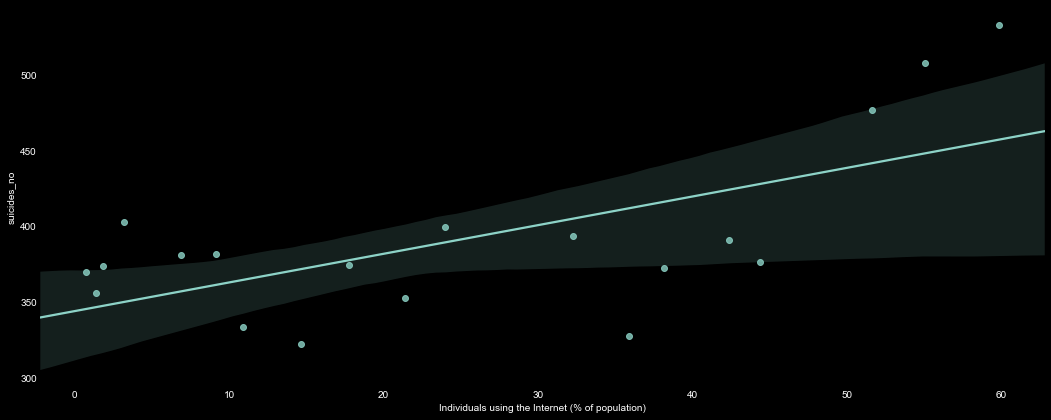

In [97]:
#Regression Plots:
sns.regplot(x="Individuals using the Internet (% of population)", y="suicides_no", data=greece_cleaned2)

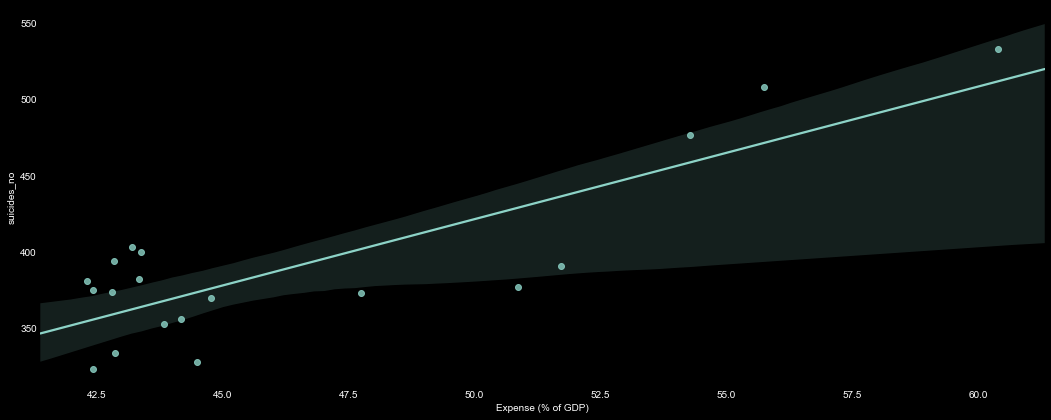

In [98]:
sns.regplot(x="Expense (% of GDP)", y="suicides_no", data=greece_cleaned2)

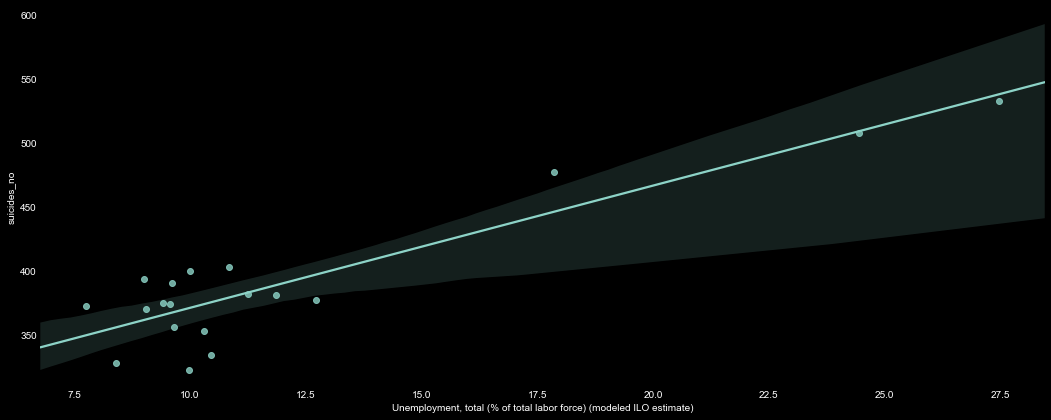

In [99]:
sns.regplot(x="Unemployment, total (% of total labor force) (modeled ILO estimate)", y="suicides_no", data=greece_cleaned2)

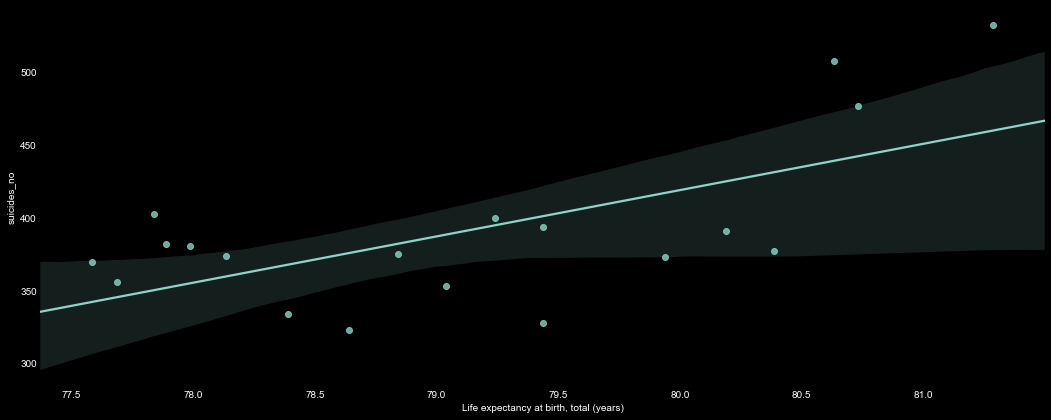

In [100]:
sns.regplot(x="Life expectancy at birth, total (years)", y="suicides_no", data=greece_cleaned2)


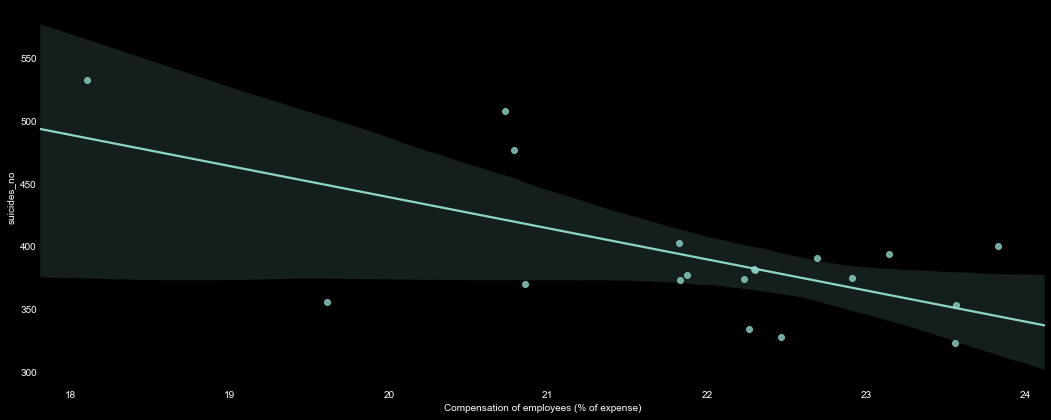

In [101]:
sns.regplot(x="Compensation of employees (% of expense)", y="suicides_no", data=greece_cleaned2)


The P-value is the probability value that the correlation between these two variables is statistically significant. When the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [102]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(greece_cleaned2['Individuals using the Internet (% of population)'], greece_cleaned2['suicides_no'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.6551670001090573  with a P-value of P = 0.0023289322716134216


Individuals using the internet shows a moderate evidence of a significant correlation with the number of suicides and the linear relationship is moderately strong

In [103]:
pearson_coef, p_value = stats.pearsonr(greece_cleaned2['Expense (% of GDP)'], greece_cleaned2['suicides_no'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8315063080525774  with a P-value of P = 1.0246695853278217e-05


Expense (% of GDP) shows a strong evidence of a significant correlation with the number of suicides and the linear relationship is strong

In [104]:
pearson_coef, p_value = stats.pearsonr(greece_cleaned2['Unemployment, total (% of total labor force) (modeled ILO estimate)'], greece_cleaned2['suicides_no'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9038882340812023  with a P-value of P = 1.121448204158423e-07


% Unemployment shows a strong evidence of a significant correlation with the number of suicides and the linear relationship is strong

In [105]:
pearson_coef, p_value = stats.pearsonr(greece_cleaned2['Life expectancy at birth, total (years)'], greece_cleaned2['suicides_no'])
print("Life expectancy at birth, total (years)", pearson_coef, " with a P-value of P =", p_value)

Life expectancy at birth, total (years) 0.6480670308619958  with a P-value of P = 0.0026936773181255548


Life expectancy at birth, total (years) shows a moderate evidence of a significant correlation with the number of suicides and the linear relationship is moderate

In [106]:
pearson_coef, p_value = stats.pearsonr(greece_cleaned2['Compensation of employees (% of expense)'], greece_cleaned2['suicides_no'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.6256917380678194  with a P-value of P = 0.004165492105416872


Compensation of employees (% of expense) shows a moderate evidence of a significant correlation with the number of suicides and the linear relationship is moderately strong

## Linear Regression

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
lm.fit(greece_cleaned2[['Individuals using the Internet (% of population)']],greece_cleaned2['suicides_no'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
Yhat=lm.predict(greece_cleaned2[['Individuals using the Internet (% of population)']])

In [111]:
Yhat

array([345.73821961, 346.95619223, 347.81302238, 350.40117733,
       357.29595411, 361.56157454, 364.94946107, 371.99419424,
       377.89785346, 384.72572771, 389.59200272, 405.15276585,
       411.99950163, 416.37537684, 424.29721989, 428.0695261 ,
       441.74412701, 448.19476738, 457.24133589])

In [112]:
#Equation of line:
print("Yhat = {} x + {}".format(str(lm.coef_[0]),str(lm.intercept_)))

Yhat = 1.8861531067020212 x + 344.32432816316464


In [113]:
lm1 = LinearRegression()
lm1.fit(greece_cleaned2[['Expense (% of GDP)']],greece_cleaned2['suicides_no'])
Yhat1=lm1.predict(greece_cleaned2[['Expense (% of GDP)']])
print(Yhat1)
#Equation of line:
print("Yhat = {} x + {}".format(str(lm1.coef_[0]),str(lm1.intercept_)))

[376.03277614 370.83830341 359.05324518 362.38423605 354.61870762
 363.65851235 359.54200049 355.70652659 355.77545204 368.0301135
 363.90164301 359.34259007 373.7054866  401.89378108 436.43039126
 429.07500428 458.63447784 471.46995047 511.906802  ]
Yhat = 8.693520923075361 x + -13.152108174573812


In [114]:
lm2 = LinearRegression()
lm2.fit(greece_cleaned2[['Unemployment, total (% of total labor force) (modeled ILO estimate)']],greece_cleaned2['suicides_no'])
Yhat2=lm2.predict(greece_cleaned2[['Unemployment, total (% of total labor force) (modeled ILO estimate)']])
print(Yhat2)
#Equation of line:
print("Yhat = {} x + {}".format(str(lm2.coef_[0]),str(lm2.intercept_)))

[362.26119305 367.92668582 367.18147632 379.23857395 388.92628824
 383.14614708 375.57941302 370.98395902 365.60507338 374.19408451
 371.16548477 361.74528019 355.89825256 349.82193743 367.55408562
 397.14269918 446.36469311 509.17241677 538.09225599]
Yhat = 9.553959431892203 x + 275.68321005172476


In [115]:
lm3 = LinearRegression()
lm3.fit(greece_cleaned2[['Life expectancy at birth, total (years)']],greece_cleaned2['suicides_no'])
Yhat3=lm3.predict(greece_cleaned2[['Life expectancy at birth, total (years)']])
print(Yhat3)
#Equation of line:
print("Yhat = {} x + {}".format(str(lm3.coef_[0]),str(lm3.intercept_)))

[342.22672564 345.4114011  359.78127845 350.30492693 355.04310269
 351.85842722 367.78180455 375.86000552 382.22935645 388.52103251
 394.89038344 401.25973437 401.25973437 417.1831117  425.10596293
 431.47531386 442.42749049 439.3204899  460.05971786]
Yhat = 31.846754655607633 x + -2128.6153854547965


In [116]:
lm4 = LinearRegression()
lm4.fit(greece_cleaned2[['Compensation of employees (% of expense)']],greece_cleaned2['suicides_no'])
Yhat4=lm4.predict(greece_cleaned2[['Compensation of employees (% of expense)']])
print(Yhat4)
#Equation of line:
print("Yhat = {} x + {}".format(str(lm4.coef_[0]),str(lm4.intercept_)))

[418.11660829 449.0173356  383.91038317 394.09348904 382.211384
 382.34458897 383.07680997 351.01922328 367.0401182  350.91248198
 344.30930153 361.326178   378.09477242 393.890674   372.47267219
 392.80051425 419.75231901 421.18303702 486.42810909]
Yhat = -24.81403587194564 x + 935.6365488638183


In [117]:
pred_vals=pd.DataFrame(greece_cleaned['suicides_no'])

In [118]:
pred_vals['Individuals using the Internet (L)']=Yhat

In [119]:
pred_vals['Expense (% of GDP) {L}']=Yhat1

In [120]:
pred_vals['Unemployment % (L)']=Yhat2

In [121]:
pred_vals['Life expectancy (L)']=Yhat3

In [122]:
pred_vals['Compensation of employees (L)']=Yhat4

In [123]:
pred_vals

suicides_no  Individuals using the Internet (L)  Expense (% of GDP) {L}  \
year                                                                            
1995          370                          345.738220              376.032776   
1996          356                          346.956192              370.838303   
1997          374                          347.813022              359.053245   
1998          403                          350.401177              362.384236   
1999          381                          357.295954              354.618708   
2000          382                          361.561575              363.658512   
2001          334                          364.949461              359.542000   
2002          323                          371.994194              355.706527   
2003          375                          377.897853              355.775452   
2004          353                          384.725728              368.030114   
2005          400                          389.592003              363.901643   
2006          394                          405.152766              359.342590   
2007          328                          411.999502              373.705487   
2008          373                          416.375377              401.893781   
2009          391                          424.297220              436.430391   
2010          377                          428.069526              429.075004   
2011          477                          441.744127              458.634478   
2012          508                          448.194767              471.469950   
2013          533                          457.241336              511.906802   

      Unemployment % (L)  Life expectancy (L)  Compensation of employees (L)  
year                                                                          
1995          362.261193           342.226726                     418.116608  
1996          367.926686           345.411401                     449.017336  
1997          367.181476           359.781278                     383.910383  
1998          379.238574           350.304927                     394.093489  
1999          388.926288           355.043103                     382.211384  
2000          383.146147           351.858427                     382.344589  
2001          375.579413           367.781805                     383.076810  
2002          370.983959           375.860006                     351.019223  
2003          365.605073           382.229356                     367.040118  
2004          374.194085           388.521033                     350.912482  
2005          371.165485           394.890383                     344.309302  
2006          361.745280           401.259734                     361.326178  
2007          355.898253           401.259734                     378.094772  
2008          349.821937           417.183112                     393.890674  
2009          367.554086           425.105963                     372.472672  
2010          397.142699           431.475314                     392.800514  
2011          446.364693           442.427490                     419.752319  
2012          509.172417           439.320490                     421.183037  
2013          538.092256           460.059718                     486.428109

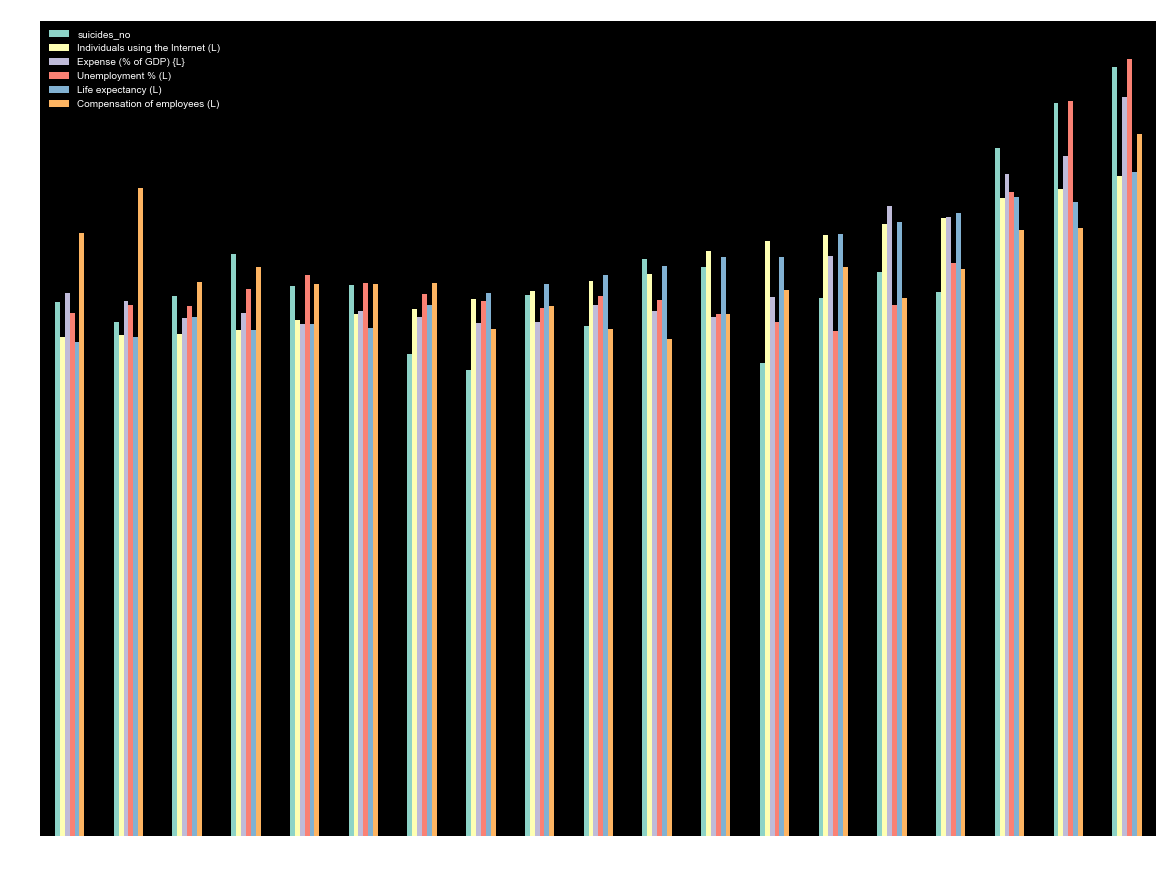

In [124]:
%matplotlib inline
pred_vals.plot(kind='bar',
             stacked=False,
             figsize=(20, 15),
            )

plt.title('Comparison of Linear Regressions with actual value')
plt.ylabel('Number of Suicides')
plt.xlabel('Years')

plt.show()

## Multiple Linear Regression

In [125]:
Z = greece_cleaned2[['Individuals using the Internet (% of population)', 'Expense (% of GDP)', 'Unemployment, total (% of total labor force) (modeled ILO estimate)', 'Life expectancy at birth, total (years)', 'Compensation of employees (% of expense)']]

In [126]:
lm5 = LinearRegression()
lm5.fit(Z, greece_cleaned2['suicides_no'])
Yhat5=lm5.predict(Z)
print(Yhat5)
#Equation of line:
print("Yhat = {} x + {}".format(str(lm5.coef_[0]),str(lm5.intercept_)))

[363.68859802 364.96666647 364.16520916 373.63490401 378.91106677
 376.89365902 369.96660753 366.43947836 361.28333222 372.56639326
 369.04024371 358.40435154 357.21923616 361.29946492 387.32761257
 407.09224509 453.51773027 506.28940217 539.29379874]
Yhat = -0.14440654660151764 x + 41.13653706625888


In [127]:
pred_vals['Mult Linear']= Yhat5

In [128]:
pred_vals

suicides_no  Individuals using the Internet (L)  Expense (% of GDP) {L}  \
year                                                                            
1995          370                          345.738220              376.032776   
1996          356                          346.956192              370.838303   
1997          374                          347.813022              359.053245   
1998          403                          350.401177              362.384236   
1999          381                          357.295954              354.618708   
2000          382                          361.561575              363.658512   
2001          334                          364.949461              359.542000   
2002          323                          371.994194              355.706527   
2003          375                          377.897853              355.775452   
2004          353                          384.725728              368.030114   
2005          400                          389.592003              363.901643   
2006          394                          405.152766              359.342590   
2007          328                          411.999502              373.705487   
2008          373                          416.375377              401.893781   
2009          391                          424.297220              436.430391   
2010          377                          428.069526              429.075004   
2011          477                          441.744127              458.634478   
2012          508                          448.194767              471.469950   
2013          533                          457.241336              511.906802   

      Unemployment % (L)  Life expectancy (L)  Compensation of employees (L)  \
year                                                                           
1995          362.261193           342.226726                     418.116608   
1996          367.926686           345.411401                     449.017336   
1997          367.181476           359.781278                     383.910383   
1998          379.238574           350.304927                     394.093489   
1999          388.926288           355.043103                     382.211384   
2000          383.146147           351.858427                     382.344589   
2001          375.579413           367.781805                     383.076810   
2002          370.983959           375.860006                     351.019223   
2003          365.605073           382.229356                     367.040118   
2004          374.194085           388.521033                     350.912482   
2005          371.165485           394.890383                     344.309302   
2006          361.745280           401.259734                     361.326178   
2007          355.898253           401.259734                     378.094772   
2008          349.821937           417.183112                     393.890674   
2009          367.554086           425.105963                     372.472672   
2010          397.142699           431.475314                     392.800514   
2011          446.364693           442.427490                     419.752319   
2012          509.172417           439.320490                     421.183037   
2013          538.092256           460.059718                     486.428109   

      Mult Linear  
year               
1995   363.688598  
1996   364.966666  
1997   364.165209  
1998   373.634904  
1999   378.911067  
2000   376.893659  
2001   369.966608  
2002   366.439478  
2003   361.283332  
2004   372.566393  
2005   369.040244  
2006   358.404352  
2007   357.219236  
2008   361.299465  
2009   387.327613  
2010   407.092245  
2011   453.517730  
2012   506.289402  
2013   539.293799

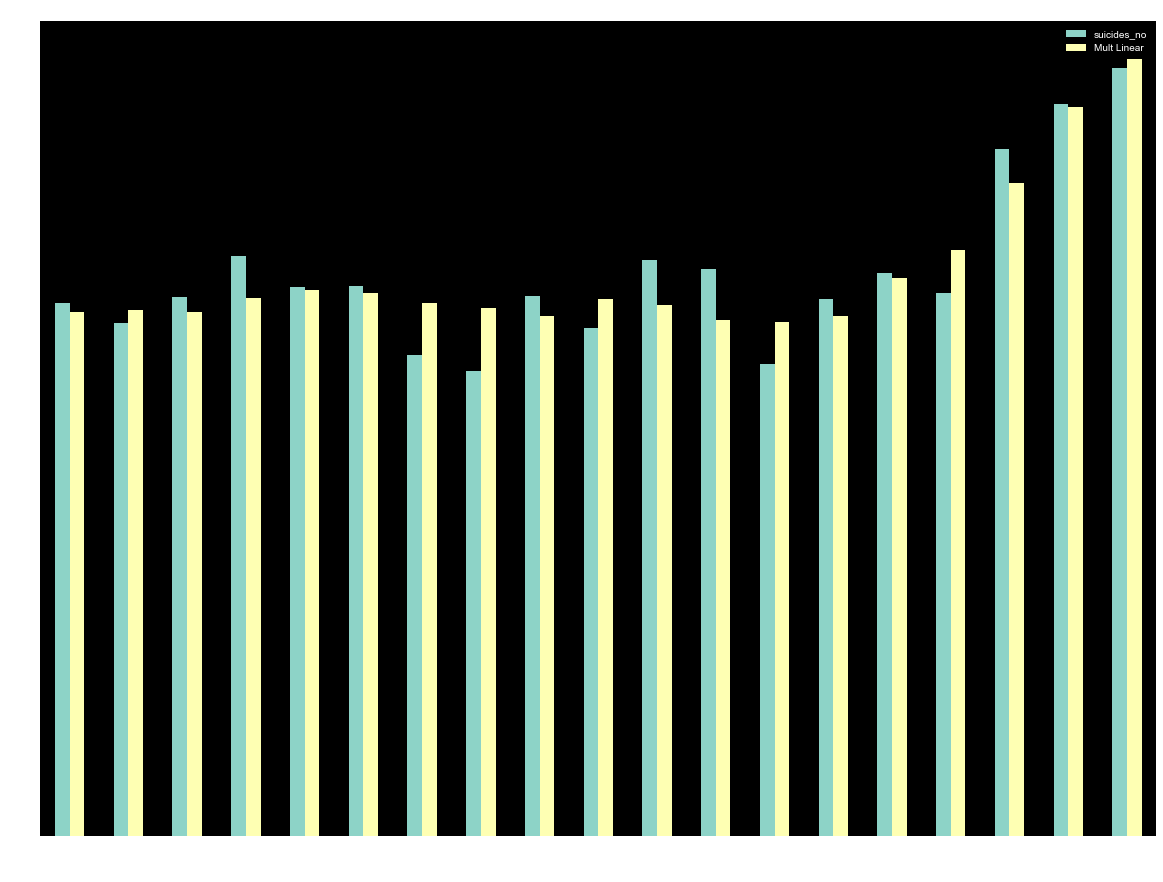

In [129]:
multL_df=pd.DataFrame()
multL_df['suicides_no']=pred_vals['suicides_no']
multL_df['Mult Linear']=pred_vals['Mult Linear']
multL_df.plot(kind='bar',
             stacked=False,
             figsize=(20, 15)
            )

plt.title('Comparison of Multi-Linear Regression with actual value')
plt.ylabel('Number of Suicides')
plt.xlabel('Years')

plt.show()

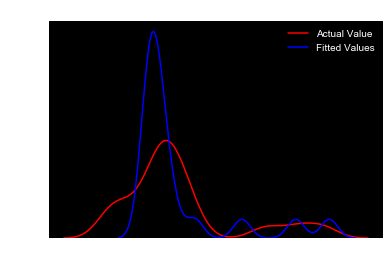

In [130]:
#DistPlot

plt.figure()
ax1 = sns.distplot(greece_cleaned['suicides_no'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat5, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values : Multiple Linear Regression')
plt.xlabel('Years')
plt.ylabel('Number of suicides')

plt.show()
plt.close()

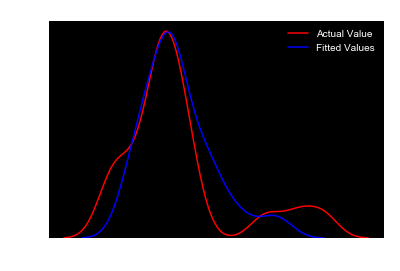

In [131]:
plt.figure()
ax1 = sns.distplot(greece_cleaned['suicides_no'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat4, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values using linear regression for Life expectancy ')
plt.xlabel('Years')
plt.ylabel('Number of suicides')

plt.show()
plt.close()

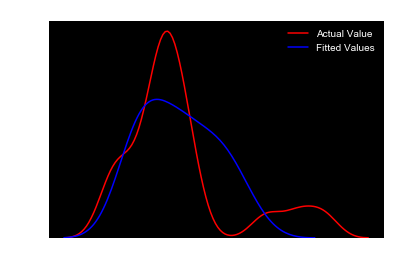

In [132]:
plt.figure()
ax1 = sns.distplot(greece_cleaned['suicides_no'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat3, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values using linear regression for unemployment %')
plt.xlabel('Years')
plt.ylabel('Number of suicides')

plt.show()
plt.close()

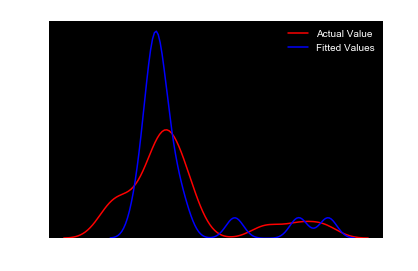

In [133]:
plt.figure()
ax1 = sns.distplot(greece_cleaned['suicides_no'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat2, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values using linear regression of expenditure (% of GDP)')
plt.xlabel('Years')
plt.ylabel('Number of suicides')

plt.show()
plt.close()

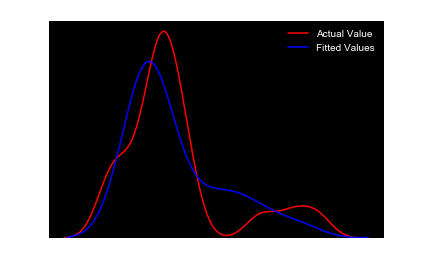

In [134]:
plt.figure()
ax1 = sns.distplot(greece_cleaned['suicides_no'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values using linear regression of individuals using the internet')
plt.xlabel('Years')
plt.ylabel('Number of suicides')

plt.show()
plt.close()

## Polynomial Regression

In [135]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit')
    ax = plt.gca()
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Number of Suicides')

    plt.show()
    plt.close()

In [136]:
x = greece_cleaned2['Individuals using the Internet (% of population)']
y = greece_cleaned2['suicides_no']
f = np.polyfit(x, y, 5)
p = np.poly1d(f)
print(p)

            5             4           3          2
-6.007e-06 x + 0.0009065 x - 0.04602 x + 0.9792 x - 8.437 x + 386.3


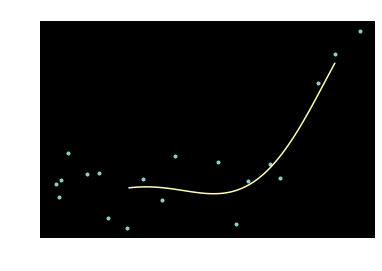

In [137]:
PlotPolly(p, x, y,'Individuals using the Internet (% of population)')

## Evaluating Models

Model 1

In [138]:
Y=greece_cleaned2['suicides_no']

In [139]:
print('The R-square is: ', lm.score(greece_cleaned2[['Individuals using the Internet (% of population)']], Y))

The R-square is:  0.4292437980319016


In [140]:
from sklearn.metrics import mean_squared_error

In [141]:
mse = mean_squared_error(Y, Yhat)
print('The mean square error is: ', mse)

The mean square error is:  1732.7114803958398


In [142]:
print('The R-square is: ', lm.score(greece_cleaned2[['Individuals using the Internet (% of population)']], Y))
mse = mean_squared_error(Y, Yhat)
print('The mean square error is: ', mse)

The R-square is:  0.4292437980319016
The mean square error is:  1732.7114803958398


Model 2

In [143]:
print('The R-square is: ', lm1.score(greece_cleaned2[['Expense (% of GDP)']], Y))
mse = mean_squared_error(Y, Yhat1)
print('The mean square error is: ', mse)

The R-square is:  0.6914027403312277
The mean square error is:  936.844860910797


Model 3

In [144]:
print('The R-square is: ', lm2.score(greece_cleaned2[['Unemployment, total (% of total labor force) (modeled ILO estimate)']], Y))
mse = mean_squared_error(Y, Yhat2)
print('The mean square error is: ', mse)

The R-square is:  0.8170139397104347
The mean square error is:  555.5122245239428


Model 4

In [145]:
print('The R-square is: ', lm3.score(greece_cleaned2[['Life expectancy at birth, total (years)']], Y))
mse = mean_squared_error(Y, Yhat3)
print('The mean square error is: ', mse)

The R-square is:  0.419990876490284
The mean square error is:  1760.8016585263242


Model 5

In [146]:
print('The R-square is: ', lm4.score(greece_cleaned2[['Compensation of employees (% of expense)']], Y))
mse = mean_squared_error(Y, Yhat4)
print('The mean square error is: ', mse)

The R-square is:  0.3914901510863291
The mean square error is:  1847.324650193793


Model 6: Multiple Linear Regression

In [147]:
print('The R-square is: ', lm5.score(Z, Y))
mse = mean_squared_error(Y, Yhat5)
print('The mean square error is: ', mse)

The R-square is:  0.833730907615482
The mean square error is:  504.76256625198


Model 7: Polynomial Regression

In [148]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)
print("MSE: ",mean_squared_error(Y, p(x)))

The R-square value is:  0.8270000073159866
MSE:  525.1963489811382


Thus we conclude that models 3, 6 and 7 are useful in predicting the number of suicides in Greece for a given year. Model 2 is also moderately useful